<h2 align="center">Trabajo de Fin de Máster:</h2>

<h1 align="center">Análisis Avanzado de Datos para la Predicción de Movimientos en el Mercado de Valores y la Identificación de Factores Influyentes en Empresas del Sector Eléctrico del IBEX 35.</h1>


<h2 align="center">Autor: Eduardo Mora González</h2>


### LIBRERÍAS

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.stochastic import sample
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import random
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt import fmin, tpe, STATUS_OK, Trials
from datetime import timedelta

np.random.seed(42)
random.seed(42)

# OBTENCIÓN DE LOS DATOS


## Obtenemos el histórico de cotizaciones y de dividendos para generar un fichero y guardarlo en la carpeta ./data/

In [1]:
# Fecha de inicio y fin para obtener el histórico de cotizaciones y dividendos
start = "2001-01-02"
end = "2023-06-02"

### Acciones de Endesa

In [16]:
cotizacion_Endesa = yf.download('ELE.MC', start=start, end=end)
cotizacion_Endesa.to_csv('./data/cotizacion_Endesa.csv')
print("COTIZACIÓN ENDESA")
cotizacion_Endesa.head()

[*********************100%%**********************]  1 of 1 completed
COTIZACIÓN ENDESA


Open       High        Low  Close  Adj Close    Volume
Date                                                                   
2001-01-02  18.150000  18.770000  17.700001  18.68   2.334867   3900039
2001-01-03  18.379999  20.070000  18.379999  19.90   2.487358  10223480
2001-01-04  20.000000  20.100000  18.900000  19.00   2.374864   7637974
2001-01-05  19.180000  19.180000  18.330000  18.68   2.334867   6998680
2001-01-08  18.719999  19.049999  18.500000  18.82   2.352366   4031715

In [13]:
dividendos_Endesa = yf.Ticker('ELE.MC').dividends.loc[start:end]
dividendos_Endesa.to_csv('./data/dividendos_Endesa.csv')
print("DIVIDENDOS ENDESA")
dividendos_Endesa.head()

DIVIDENDOS ENDESA


Date
2001-01-02 00:00:00+01:00    0.2400
2001-07-02 00:00:00+02:00    0.4100
2002-01-02 00:00:00+01:00    0.2640
2002-07-01 00:00:00+02:00    0.4185
2003-01-02 00:00:00+01:00    0.2640
Name: Dividends, dtype: float64

### Acciones de Iberdrola

In [17]:
cotizacion_Iberdrola = yf.download('IBE.MC', start=start, end=end)
cotizacion_Iberdrola.to_csv('./data/cotizacion_Iberdrola.csv')
print("COTIZACIÓN IBERDROLA")
cotizacion_Iberdrola.head()

[*********************100%%**********************]  1 of 1 completed
COTIZACIÓN IBERDROLA


Open    High     Low   Close  Adj Close    Volume
Date                                                           
2001-01-02  3.3375  3.4700  3.2525  3.3975   1.214773   9392264
2001-01-03  3.3525  3.7000  3.3525  3.7000   1.322932  26070124
2001-01-04  3.6875  3.6875  3.4875  3.4875   1.246952  20124272
2001-01-05  3.5600  3.5600  3.4025  3.5575   1.271981  16939544
2001-01-08  3.5575  3.5875  3.4775  3.5625   1.273768  13723568

In [15]:
dividendos_Iberdrola = yf.Ticker('IBE.MC').dividends.loc[start:end]
dividendos_Iberdrola.to_csv('./data/dividendos_Iberdrola.csv')
print("DIVIDENDOS IBERDROLA")
dividendos_Iberdrola.head()

DIVIDENDOS IBERDROLA


Date
2001-01-02 00:00:00+01:00    0.057500
2001-07-02 00:00:00+02:00    0.078872
2002-01-02 00:00:00+01:00    0.061525
2002-07-01 00:00:00+02:00    0.084712
2003-01-02 00:00:00+01:00    0.065000
Name: Dividends, dtype: float64

### Acciones de Acciona Energías

In [18]:
cotizacion_Acciona_Energias = yf.download('ANE.MC', start=start, end=end)
cotizacion_Acciona_Energias.to_csv('./data/cotizacion_Acciona_Energias.csv')
print("COTIZACIÓN ACCIONA ENERGÍAS")
cotizacion_Acciona_Energias.head()

[*********************100%%**********************]  1 of 1 completed
COTIZACIÓN ACCIONA ENERGÍAS


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-07-02  29.000000  29.299999  27.990000  29.299999  28.436935  1048322
2021-07-05  29.500000  29.500000  28.549999  29.000000  28.145775   721560
2021-07-06  29.100000  29.100000  28.500000  28.790001  27.941961   339807
2021-07-07  28.790001  29.500000  28.520000  29.500000  28.631046   396667
2021-07-08  29.480000  29.900000  29.059999  29.900000  29.019262   279224

In [20]:
dividendos_Acciona_Energias = yf.Ticker('ANE.MC').dividends.loc[start:end]
dividendos_Acciona_Energias.to_csv('./data/dividendos_Acciona_Energias.csv')
print("DIVIDENDOS ACCIONA ENERGÍAS")
dividendos_Acciona_Energias.head()

DIVIDENDOS ACCIONA ENERGÍAS


Date
2022-04-19 00:00:00+02:00    0.280111
Name: Dividends, dtype: float64

### Acciones de Solaria

In [21]:
cotizacion_Solaria = yf.download('SLR.MC', start=start, end=end)
cotizacion_Solaria.to_csv('./data/cotizacion_Solaria.csv')
print("COTIZACIÓN SOLARIA")
cotizacion_Solaria.head()

[*********************100%%**********************]  1 of 1 completed
COTIZACIÓN SOLARIA


Open   High    Low  Close  Adj Close    Volume
Date                                                       
2007-06-19  12.50  12.99  10.82  11.90  11.528429  18065380
2007-06-20  11.90  13.40  11.80  12.95  12.545642   8887020
2007-06-21  12.95  13.33  12.51  12.57  12.177507   3080259
2007-06-22  12.75  12.80  11.90  12.37  11.983752   1822089
2007-06-25  12.37  12.80  12.00  12.77  12.371264   4761130

In [22]:
dividendos_Solaria = yf.Ticker('SLR.MC').dividends.loc[start:end]
dividendos_Solaria.to_csv('./data/dividendos_Solaria.csv')
print("DIVIDENDOS SOLARIA")
dividendos_Solaria.head()

DIVIDENDOS SOLARIA


Date
2010-09-15 00:00:00+02:00    0.020
2011-05-25 00:00:00+02:00    0.015
2011-10-03 00:00:00+02:00    0.020
Name: Dividends, dtype: float64

### Acciones de Naturgy


In [23]:
cotizacion_Naturgy = yf.download('NTGY.MC', start=start, end=end)
cotizacion_Naturgy.to_csv('./data/cotizacion_Naturgy.csv')
print("COTIZACIÓN NATURGY")
cotizacion_Naturgy.head()

[*********************100%%**********************]  1 of 1 completed
COTIZACIÓN NATURGY


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2001-01-02  16.563990  17.245285  16.291471  16.606569   5.298069  1120990
2001-01-03  16.393665  17.330446  16.265923  17.279348   5.512709  1511823
2001-01-04  17.458189  17.458189  16.879087  17.321930   5.526294  1717835
2001-01-05  17.321930  17.458189  16.572506  16.598055   5.295353  1347595
2001-01-08  16.793926  16.930185  16.640635  16.776894   5.352409   733408

In [24]:
dividendos_Naturgy = yf.Ticker('NTGY.MC').dividends.loc[start:end]
dividendos_Naturgy.to_csv('./data/dividendos_Naturgy.csv')
print("DIVIDENDOS NATURGY")
dividendos_Naturgy.head()

DIVIDENDOS NATURGY


Date
2001-01-11 00:00:00+01:00    0.102194
2001-07-02 00:00:00+02:00    0.136259
2002-01-10 00:00:00+01:00    0.119227
2002-07-01 00:00:00+02:00    0.161808
2003-01-10 00:00:00+01:00    0.144775
Name: Dividends, dtype: float64

Observamos que la API presenta una limitación al proporcionar únicamente el historial de cotizaciones para Endesa, Naturgy e Iberdrola desde el año 2001, el de Solaria desde el año 2007 y el de Acciona Energías desde el año 2021. Esta restricción surge de la disponibilidad parcial de datos históricos proporcionados por la API para cada empresa específica, lo que puede afectar la completitud de la información que podemos obtener. A pesar de esta limitación, es importante señalar que disponemos de un rango de años bastante extenso, lo que nos permite acceder a datos significativos de la evolución de las cotizaciones de estas empresas en el mercado financiero.

# ANÁLISIS INICIAL DE LOS DATOS

## Acciones de Endesa

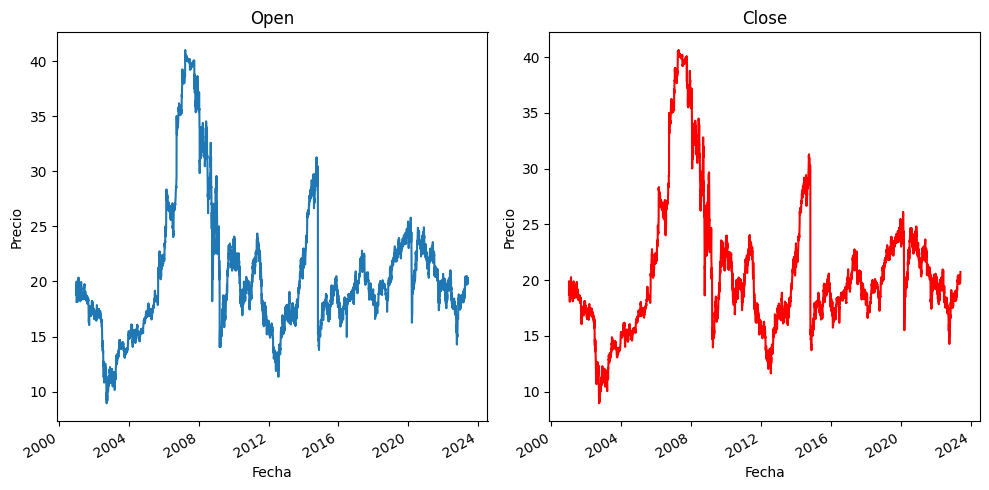

In [39]:
# Crea una nueva figura con dos ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Grafica 'Open' en el primer eje
cotizacion_Endesa['Open'].plot(ax=ax1)
ax1.set_title('Open')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio')

# Grafica 'Close' en rojo en el segundo eje
cotizacion_Endesa['Close'].plot(ax=ax2, color='red')
ax2.set_title('Close')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio')

plt.tight_layout()
plt.show()

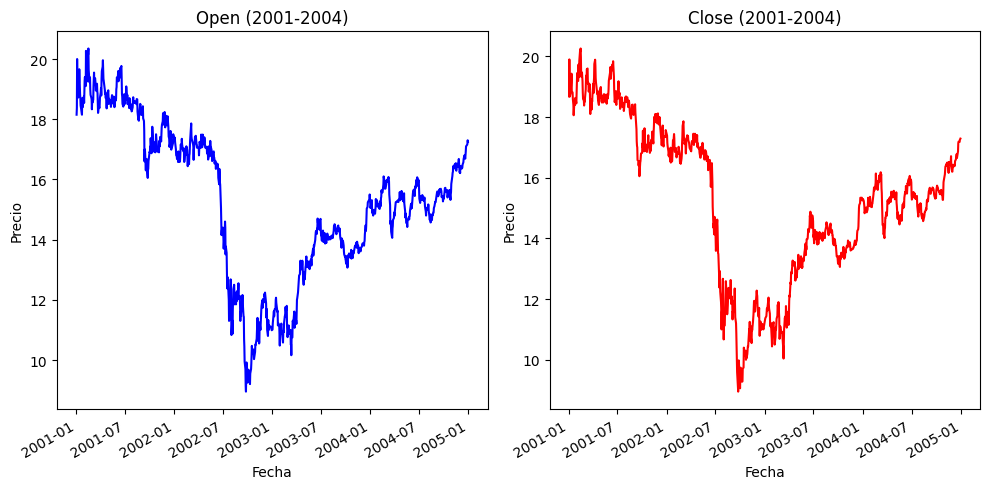

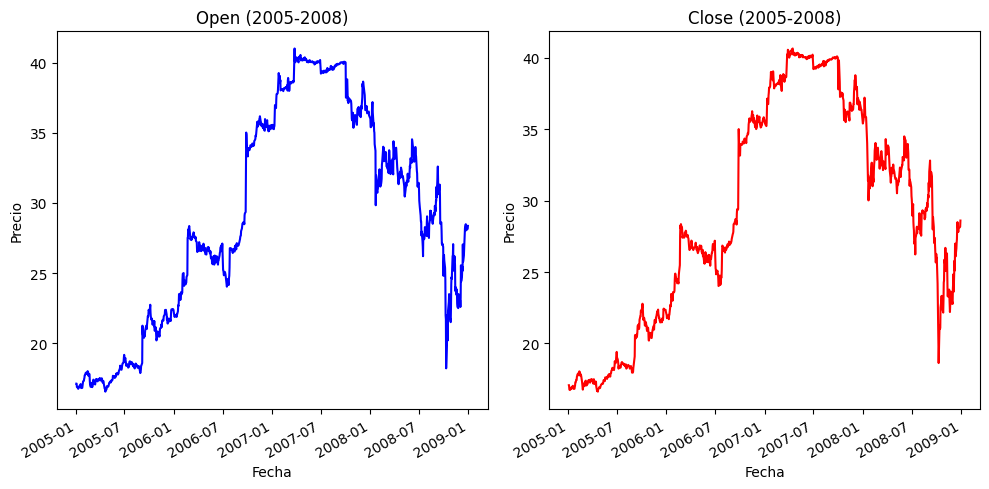

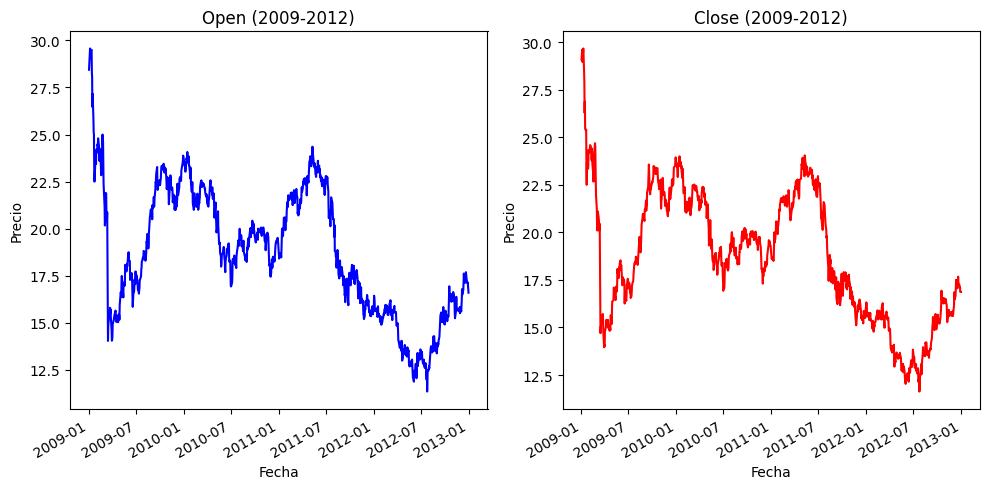

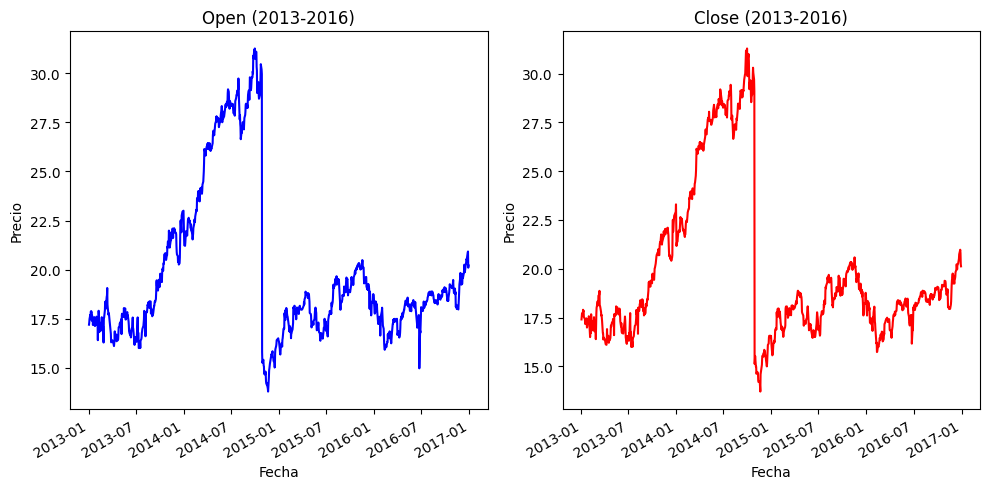

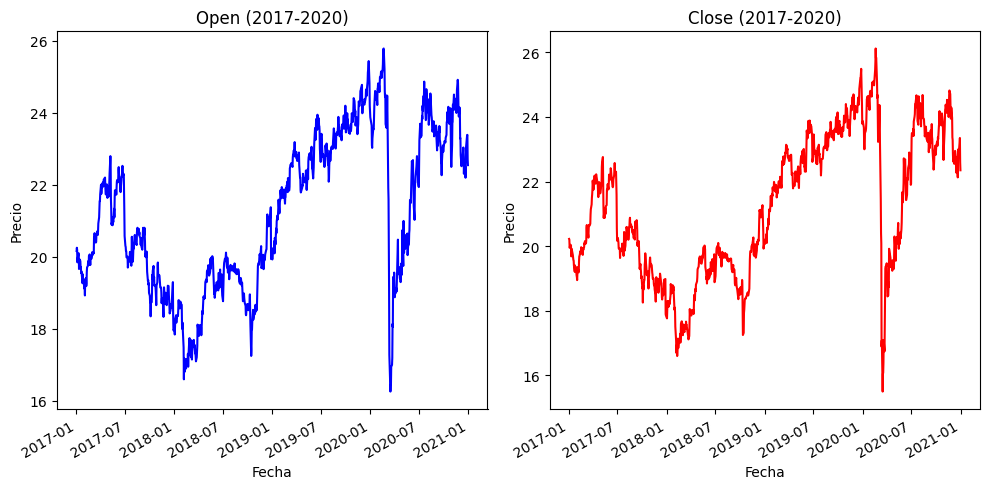

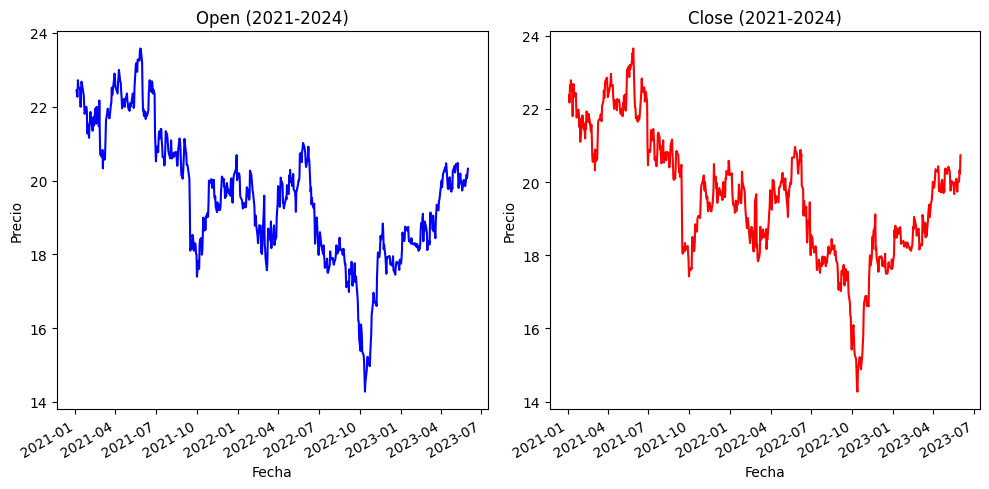

In [33]:
import matplotlib.pyplot as plt

# Obtiene el año inicial y final
start_year = cotizacion_Endesa.index.year.min()
end_year = cotizacion_Endesa.index.year.max()

# Para cada período de 4 años
for year in range(start_year, end_year + 1, 4):
    # Crea un nuevo DataFrame para el período de 4 años
    cotizacion_Endesa_4yr = cotizacion_Endesa[(cotizacion_Endesa.index.year >= year) & (cotizacion_Endesa.index.year < year + 4)]
    
    # Crea una nueva figura con dos ejes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Grafica 'Open' en azul en el primer eje
    cotizacion_Endesa_4yr['Open'].plot(ax=ax1, color='blue')
    ax1.set_title(f'Open ({year}-{year+3})')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio')

    # Grafica 'Close' en rojo en el segundo eje
    cotizacion_Endesa_4yr['Close'].plot(ax=ax2, color='red')
    ax2.set_title(f'Close ({year}-{year+3})')
    ax2.set_xlabel('Fecha')
    ax2.set_ylabel('Precio')

    plt.tight_layout()
    plt.show()

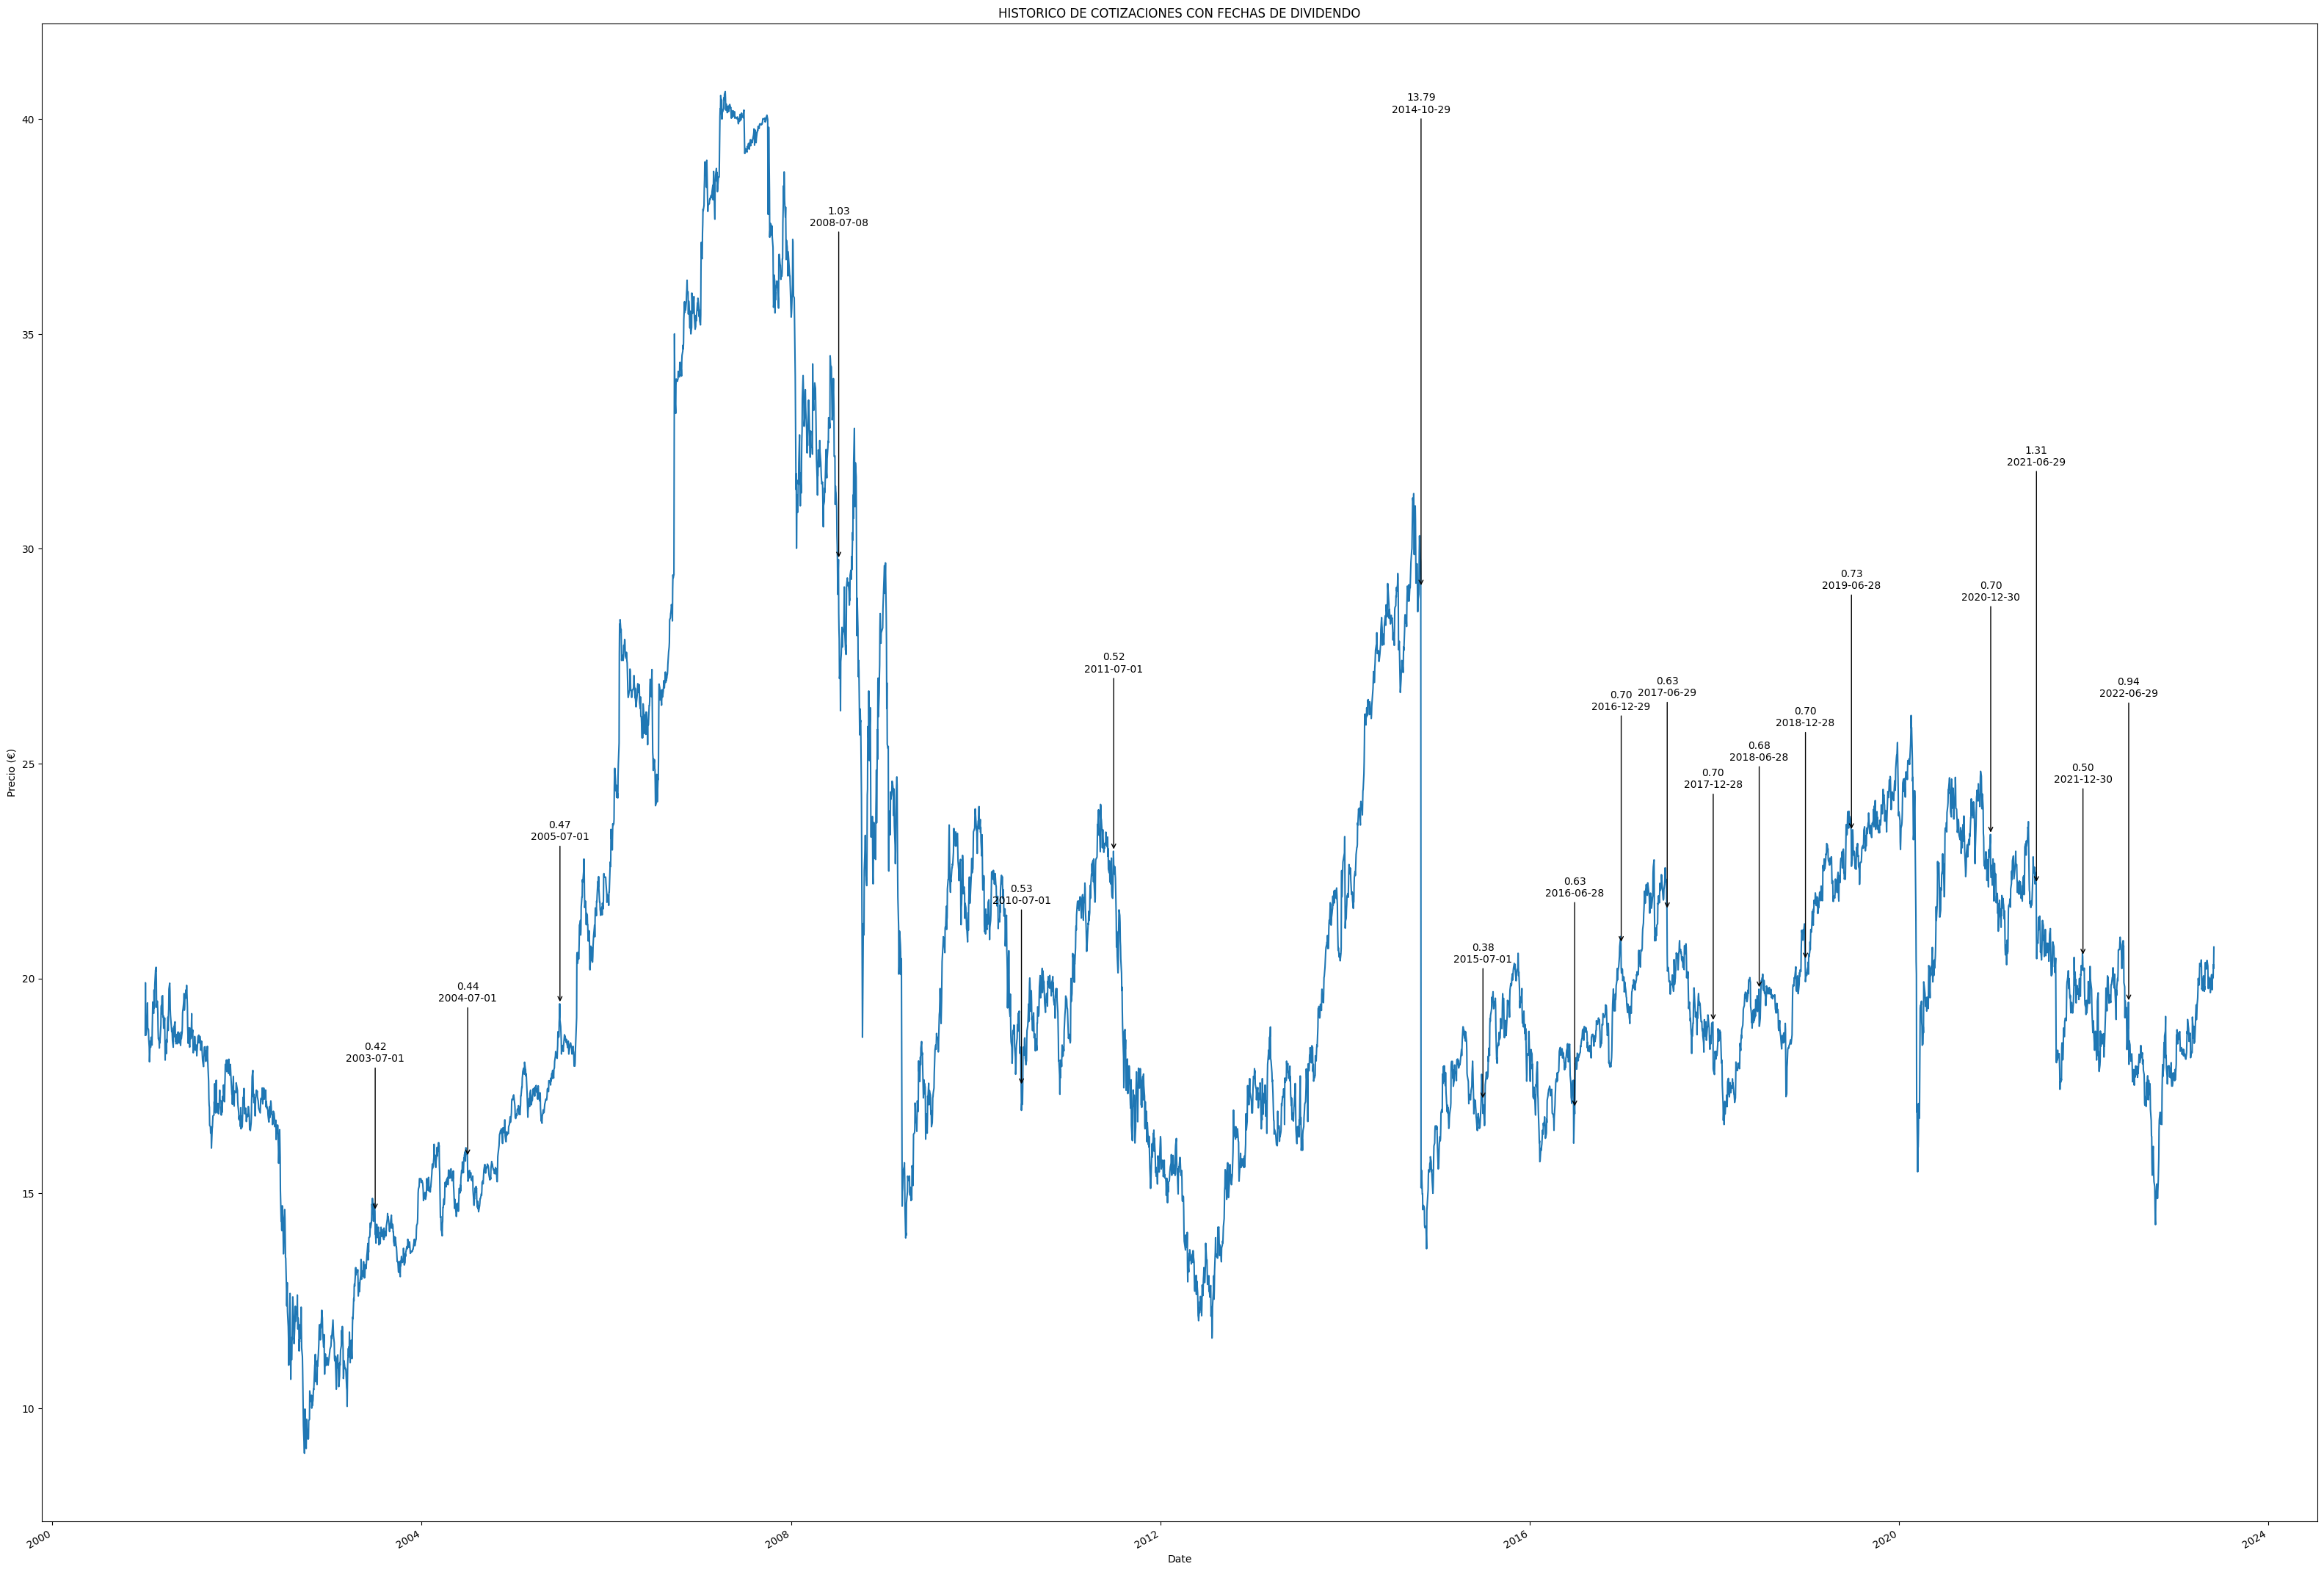

In [58]:
fechas_str = [ts.strftime('%Y-%m-%d') for ts in dividendos_Endesa.index.tolist()]
sizes = dividendos_Endesa.tolist()

plt.figure(figsize=(40,30))
ax = cotizacion_Endesa['Close'].plot(title='HISTORICO DE COTIZACIONES CON FECHAS DE DIVIDENDO', ylabel='Precio (€)')

for idx, date in enumerate(fechas_str):
    previous_close = cotizacion_Endesa['Close'].get(pd.Timestamp(date) - pd.Timedelta(days=1))
    if previous_close is not None:
        end_point = previous_close + sizes[idx] * 7
        
        if sizes[idx] > 1.5:
            end_point = previous_close + 1.5 * 7

        # Agrega la fecha debajo del valor
        ax.annotate(f'{sizes[idx]:.2f}\n{date}', xy=(date, previous_close), xytext=(date, end_point + 0.5), 
                    arrowprops=dict(facecolor='red', arrowstyle="->"),
                    horizontalalignment='center', verticalalignment='bottom')

plt.show()

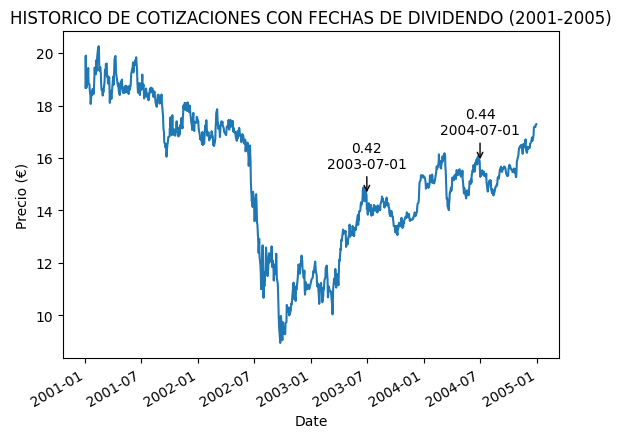

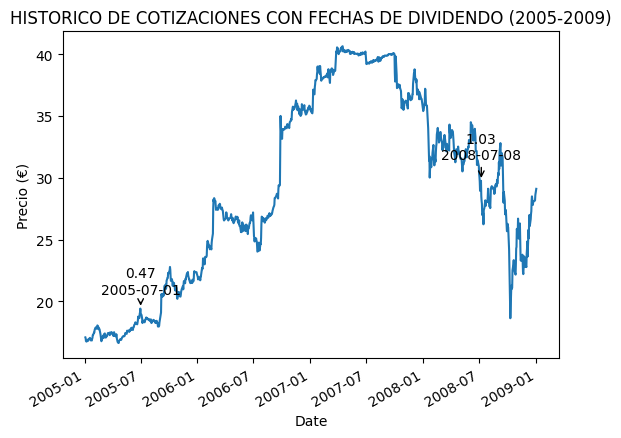

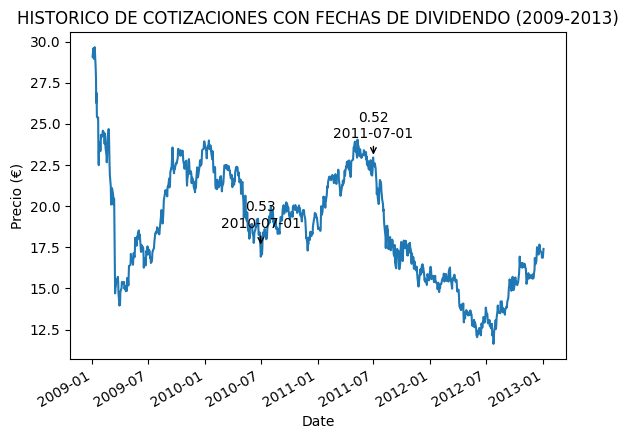

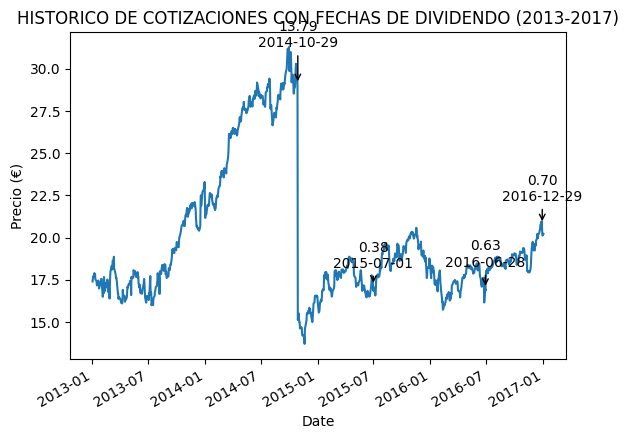

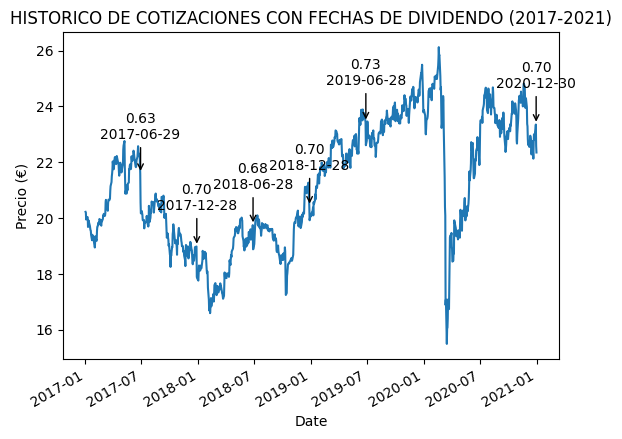

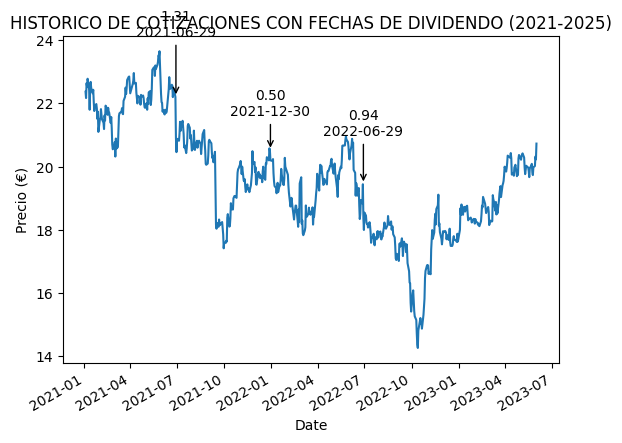

In [62]:
import numpy as np

fechas_str = [ts.strftime('%Y-%m-%d') for ts in dividendos_Endesa.index.tolist()]
sizes = dividendos_Endesa.tolist()

# Calcula el número de períodos de 4 años
num_periods = int(np.ceil((cotizacion_Endesa.index.max() - cotizacion_Endesa.index.min()).days / (4 * 365)))

for i in range(num_periods):
    start_date = cotizacion_Endesa.index.min() + pd.DateOffset(years=4*i)
    end_date = start_date + pd.DateOffset(years=4)
    
    # Filtra los datos para el período actual
    cotizacion_period = cotizacion_Endesa.loc[start_date:end_date]
    fechas_str_period = [date for date in fechas_str if start_date <= pd.Timestamp(date) <= end_date]
    sizes_period = [size for date, size in zip(fechas_str, sizes) if start_date <= pd.Timestamp(date) <= end_date]
    
    plt.figure()
    ax = cotizacion_period['Close'].plot(title=f'HISTORICO DE COTIZACIONES CON FECHAS DE DIVIDENDO ({start_date.year}-{end_date.year})', ylabel='Precio (€)')

    for idx, date in enumerate(fechas_str_period):
        previous_close = cotizacion_period['Close'].get(pd.Timestamp(date) - pd.Timedelta(days=1))
        if previous_close is not None:
            end_point = previous_close + sizes_period[idx] * 1

            if sizes_period[idx] > 1.5:
                end_point = previous_close + 1.5 * 1

            # Agrega la fecha debajo del valor
            ax.annotate(f'{sizes_period[idx]:.2f}\n{date}', xy=(date, previous_close), xytext=(date, end_point + 0.5), 
                        arrowprops=dict(facecolor='red', arrowstyle="->"),
                        horizontalalignment='center', verticalalignment='bottom')

    plt.show()

## Comprobamos qué días existen descuadres entre el cierre del día anterior y la apertura del día corriente. 
Estos descuadres pueden deberse a Información después del cierre del mercado, Operaciones fuera del horario de mercado (after-hours trading), ordenes acumuladas, operaciones internacionales... Y en cualquier caso queremos una lista con los descuadres superiores al 2% para tratar de encontrar algún patrón.

In [4]:
cotizacion['Diff_Percent'] = ((cotizacion['Open'] - cotizacion['Close'].shift(1)) / cotizacion['Close'].shift(1)) * 100
dias_superiores_2_pc = cotizacion[cotizacion['Diff_Percent'].abs() > 2]

lista_dias_superiores_2_pc = dias_superiores_2_pc.index.strftime('%Y-%m-%d').tolist()
print(lista_dias_superiores_2_pc)

['2001-02-06', '2001-05-02', '2001-09-12', '2001-10-17', '2002-06-26', '2002-07-01', '2002-07-11', '2002-07-24', '2002-07-25', '2002-08-06', '2002-08-08', '2002-08-14', '2002-08-16', '2002-09-17', '2002-09-26', '2002-09-30', '2002-10-02', '2002-10-11', '2002-11-04', '2003-01-07', '2003-01-30', '2003-01-31', '2003-02-26', '2003-03-17', '2003-03-31', '2003-06-03', '2004-03-15', '2005-07-01', '2005-09-06', '2006-02-21', '2006-07-03', '2006-07-28', '2006-09-26', '2006-09-27', '2007-02-05', '2007-03-26', '2007-07-02', '2007-10-03', '2007-10-08', '2008-01-22', '2008-01-24', '2008-03-17', '2008-03-18', '2008-03-25', '2008-07-08', '2008-07-23', '2008-09-15', '2008-09-30', '2008-10-06', '2008-10-08', '2008-10-10', '2008-10-13', '2008-10-14', '2008-10-16', '2008-10-17', '2008-10-21', '2008-10-24', '2008-10-27', '2008-10-29', '2008-11-04', '2008-11-06', '2008-11-10', '2008-11-11', '2008-11-12', '2008-11-14', '2008-12-03', '2008-12-04', '2008-12-08', '2008-12-12', '2009-02-23', '2009-03-02', '2009

## Contamos 'descuadres' en cada año

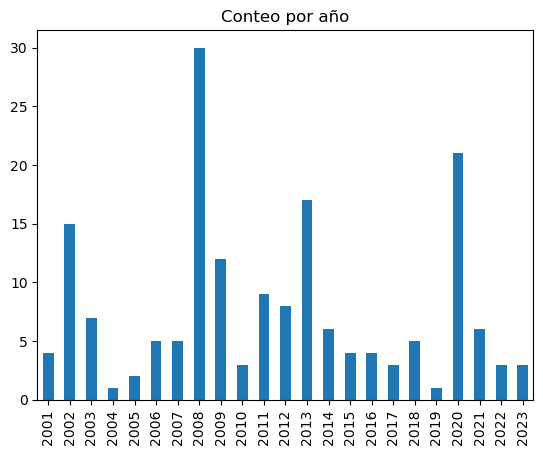

In [5]:
dates_series = pd.Series(pd.to_datetime(lista_dias_superiores_2_pc))

year_counts = dates_series.dt.year.value_counts().sort_index()
year_counts.plot(kind='bar', title='Conteo por año')

plt.show()

## Contamos 'descuadres' por weekday

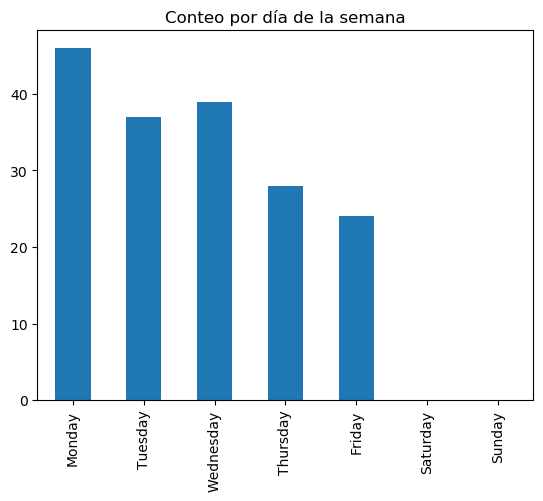

In [6]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = dates_series.dt.day_name().value_counts().reindex(weekday_order).fillna(0)

weekday_counts.plot(kind='bar', title='Conteo por día de la semana')
plt.show()

## Contamos 'descuadres' por mes

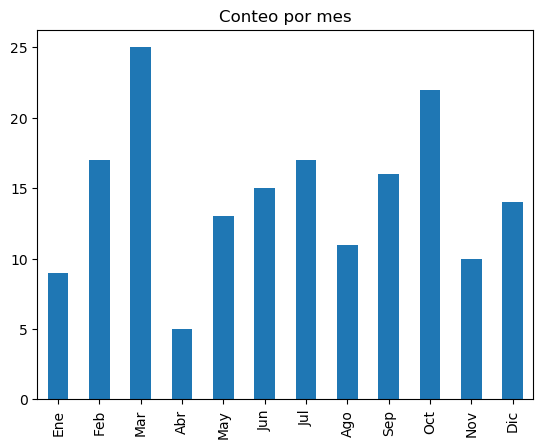

In [7]:
month_counts = dates_series.dt.month.value_counts().sort_index()
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
month_counts.index = month_names
month_counts.plot(kind='bar', title='Conteo por mes')
plt.show()

In [8]:
cotizacion.nlargest(5, 'Diff_Percent')

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2005-09-06  21.250000  21.270000  20.299999  20.549999   2.932246   57627240   
2006-02-21  27.500000  27.940001  27.400000  27.549999   3.985775   51632444   
2006-09-26  31.709999  33.099998  31.650000  32.500000   4.931656  211188464   
2006-09-27  35.009998  35.250000  34.549999  35.000000   5.311015   35571756   
2020-05-05  21.000000  21.000000  20.240000  20.240000  15.341813    1102381   

            Diff_Percent  
Date                      
2005-09-06     11.314824  
2006-02-21      7.927788  
2006-09-26      7.857141  
2006-09-27      7.723072  
2020-05-05      7.416884

### Si observamos uno a uno los descuadres más importantes, encontramos un patrón de noticias que respaldan cada fecha, si bien pueden no ser fácilmente predecibles:
Interesante, entre otros: https://www.elmundo.es/mundodinero/2007/01/31/economia/1170245949.html

## 2005-09-06
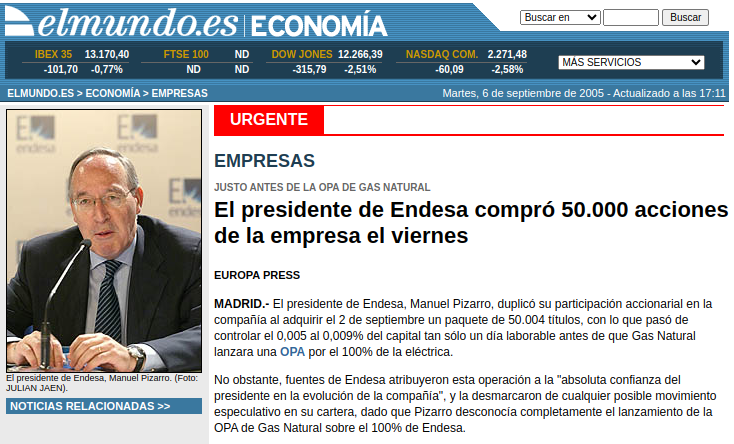

## 2006-02-21
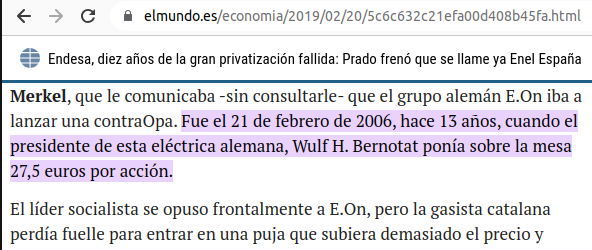

## 2006-09-26 y 2006-09-27
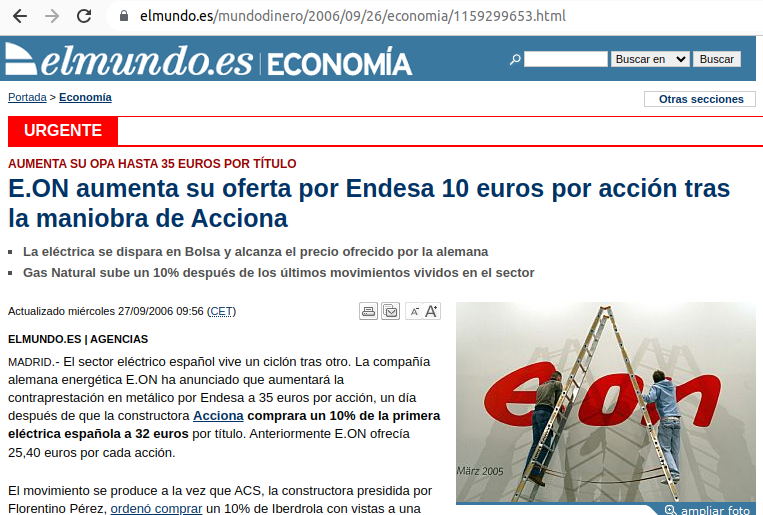

## 2020-05-05
https://www.endesa.com/content/dam/enel-es/home/inversores/informe2020/ia-2020.pdf <br>
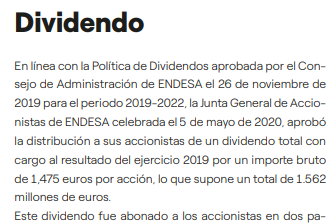

In [9]:
cotizacion.nsmallest(5, 'Diff_Percent')

Open    High        Low      Close  Adj Close    Volume  \
Date                                                                       
2014-10-29  15.800000  16.000  14.890000  15.130000   8.196055   9657735   
2009-03-16  14.040000  15.050  14.020000  14.700000   3.387702   3415061   
2016-06-24  14.965000  16.465  14.690000  16.165001   9.367683   3388533   
2008-10-10  18.209999  20.740  18.010000  18.629999   3.055948   1896132   
2006-07-03  25.209999  25.400  25.110001  25.260000   3.833036  14952236   

            Diff_Percent  
Date                      
2014-10-29    -45.704467  
2009-03-16    -31.378296  
2016-06-24    -15.116274  
2008-10-10     -9.267567  
2006-07-03     -7.282094

Eventos como la devolución de cantidades mal cobradas:<br>
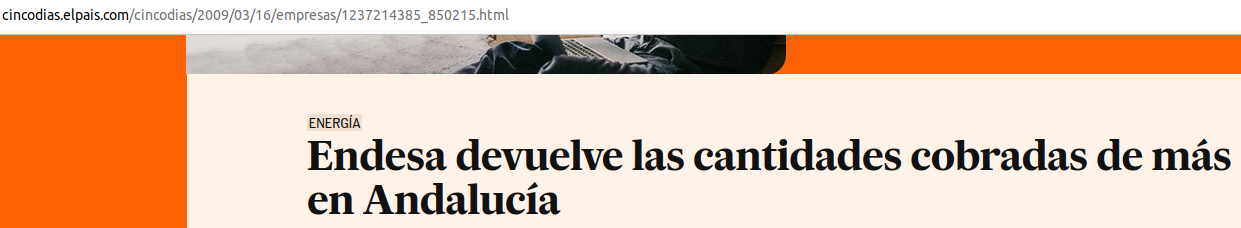
<br>afectan de forma negativa, como en el segundo caso.

## Otro efecto interesante es el de los dividendos, que podemos comprobar gráficamente mediante un formato de 'velas', que tiene en cuenta todos los valores del dataframe y nos ayuda a detectar grandes cambios en los valores de un día a otro. Por ejemplo, en este caso estamos observando el reparto del que se consideraba el 'dividendo más grande de la historia de España'.
https://cincodias.elpais.com/cincodias/2014/10/08/mercados/1412788567_849485.html

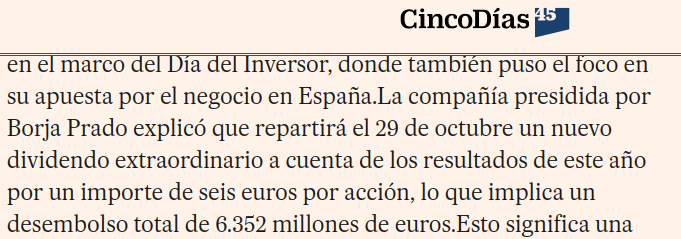

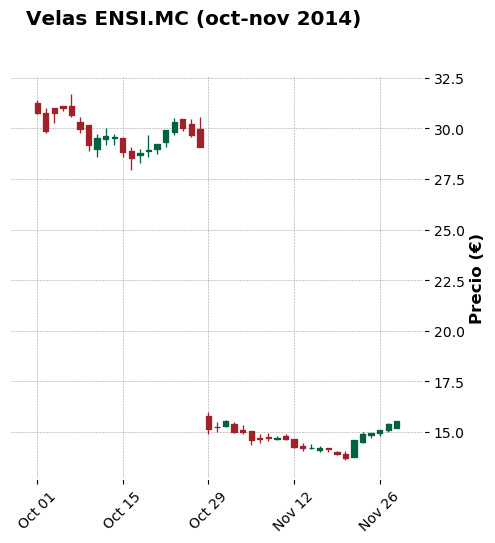

In [10]:
mpf.plot(cotizacion[(cotizacion.index >= '2014-10-01') & (cotizacion.index <= '2014-11-30')], type='candle', style='charles', 
         title='Velas ENSI.MC (oct-nov 2014)', 
         ylabel='Precio (€)', 
         volume=False, 
         figratio=(10,10),
         warn_too_much_data=10000)

En cuanto el accionista pierde el derecho de recibir un dividendo (fecha ex-dividendo), la acción baja aproximadamente el mismo valor que el propio dividendo. Aun así, es interesante conocer el efecto de este reparto en cómo se comporta el precio del valor.

In [11]:
dividendos = yf.Ticker('ELE.MC').dividends.loc[start:end]
dividendos.head()

Date
2001-01-02 00:00:00+01:00    0.2400
2001-07-02 00:00:00+02:00    0.4100
2002-01-02 00:00:00+01:00    0.2640
2002-07-01 00:00:00+02:00    0.4185
2003-01-02 00:00:00+01:00    0.2640
Name: Dividends, dtype: float64

Comprobamos que existe, entre otros muchos, el correspondiente al 29 de octubre que observamos más arriba.

In [12]:
dividendos.loc['2014-10-28':'2014-10-30']

Date
2014-10-29 00:00:00+01:00    13.795
Name: Dividends, dtype: float64

Y que la diferencia entre el cierre del día 28 y la apertura del 29 coincide, aproximadamente, con el valor del dividendo.

In [13]:
cotizacion.loc['2014-10-28':'2014-10-30']

Open    High    Low  Close  Adj Close   Volume  Diff_Percent
Date                                                                         
2014-10-28  29.969999  30.580  29.10  29.10   8.290854  5616528      0.909086
2014-10-29  15.800000  16.000  14.89  15.13   8.196055  9657735    -45.704467
2014-10-30  15.250000  15.495  15.01  15.22   8.244808  2681242      0.793125

## Pero para nuestro cometido 'predictivo' tomaremos únicamente el valor 'Close' de cada sesión, al que superponemos en este gráfico los valores de los dividendos repartidos.

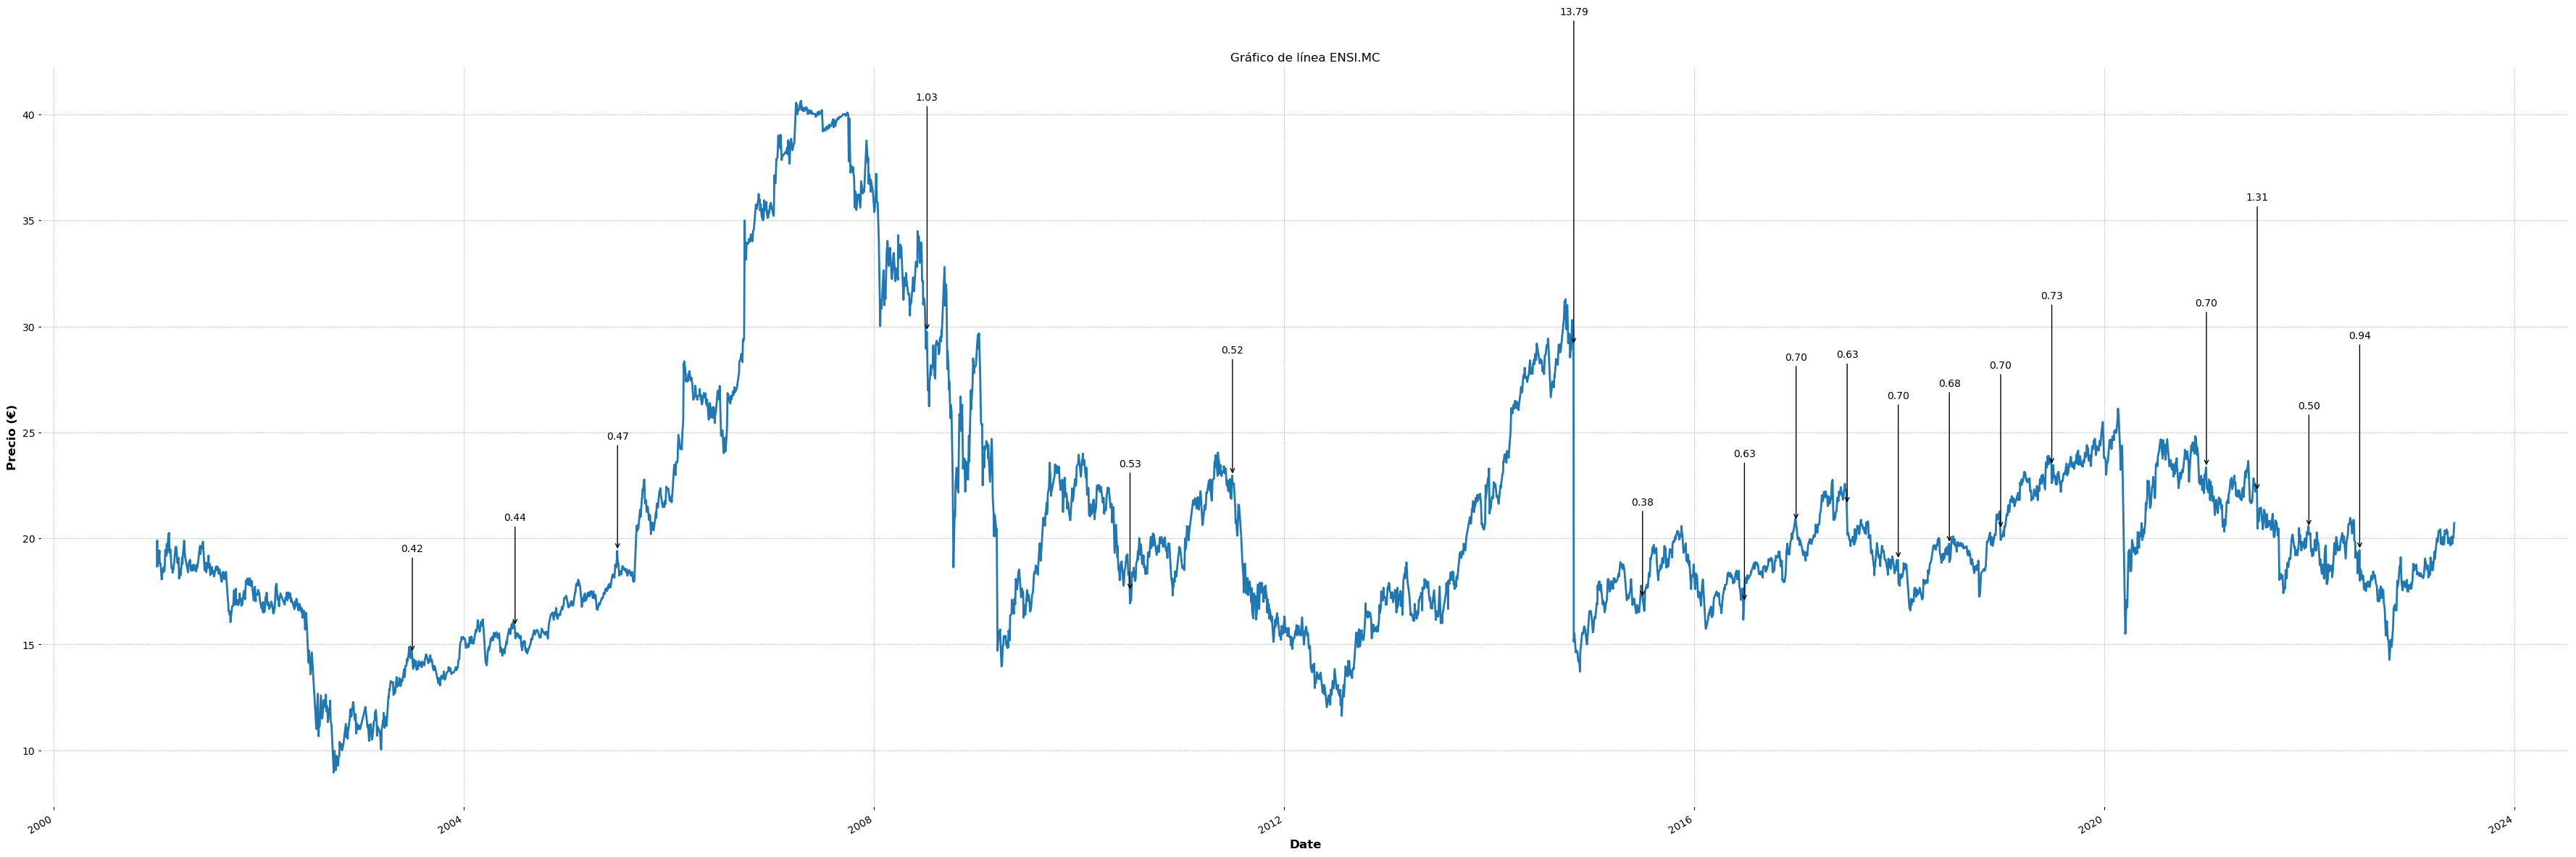

In [14]:
fechas_str = [ts.strftime('%Y-%m-%d') for ts in dividendos.index.tolist()]
sizes = dividendos.tolist()

plt.figure(figsize=(45,15))
ax = cotizacion['Close'].plot(title='Gráfico de línea ENSI.MC', ylabel='Precio (€)')

for idx, date in enumerate(fechas_str):
    previous_close = cotizacion['Close'].get(pd.Timestamp(date) - pd.Timedelta(days=1))
    if previous_close is not None:
        end_point = previous_close + sizes[idx] * 10 
        
        if sizes[idx] > 1.5:
            end_point = previous_close + 1.5 * 10

        ax.annotate(f'{sizes[idx]:.2f}', xy=(date, previous_close), xytext=(date, end_point + 0.5), 
                    arrowprops=dict(facecolor='red', arrowstyle="->"),
                    horizontalalignment='center', verticalalignment='bottom')

plt.show()

## Si los valores de los dividendos se 'restan aritméticamente' del precio de la acción, podríamos pensar que su efecto se puede revertir a la hora de manejar la serie temporal, teniendo en cuenta restarle el valor total de los dividendos para obtener la versión real.

In [15]:
print(f"El valor total de los dividendos hasta el momento es de {dividendos.sum()}")

El valor total de los dividendos hasta el momento es de 42.89566


In [16]:
dividendos_resampled = dividendos.resample('D').sum().fillna(0)
dividendos_acumulados = dividendos_resampled.cumsum()

dividendos_acumulados.index = dividendos_acumulados.index.tz_localize(None)

end_date = pd.Timestamp('2023-06-30').tz_localize(None)
new_index = pd.date_range(dividendos_acumulados.index[0], end_date)

dividendos_acumulados = dividendos_acumulados.reindex(new_index, method='ffill')

print(dividendos_acumulados)

2001-01-02     0.24000
2001-01-03     0.24000
2001-01-04     0.24000
2001-01-05     0.24000
2001-01-06     0.24000
                ...   
2023-06-26    42.89566
2023-06-27    42.89566
2023-06-28    42.89566
2023-06-29    42.89566
2023-06-30    42.89566
Freq: D, Name: Dividends, Length: 8215, dtype: float64


In [17]:
dividendos_acumulados.index = dividendos_acumulados.index.tz_localize(None)
cotizacion['Close'] += dividendos_acumulados.reindex(cotizacion.index, fill_value=0)

print(cotizacion['Close'])

Date
2001-01-02    18.92000
2001-01-03    20.14000
2001-01-04    19.24000
2001-01-05    18.92000
2001-01-08    19.06000
                ...   
2023-05-26    62.87566
2023-05-29    62.91566
2023-05-30    63.21566
2023-05-31    63.12566
2023-06-01    63.62566
Name: Close, Length: 5699, dtype: float64


## Esta sería la serie temporal de Close restando el impacto de los dividendos.
### La resampleamos además a su media mensual, restando así complejidad al dataset y evitando el efecto de pequeños 'movimientos' bursátiles que el propio mercado compense a corto plazo (mensual).

In [18]:
cotizacion_mensual = cotizacion['Close'].resample('M').median().to_frame(name='Close')

print(cotizacion_mensual)

                Close
Date                 
2001-01-31  18.920000
2001-02-28  19.580000
2001-03-31  19.115000
2001-04-30  19.119999
2001-05-31  18.920000
...               ...
2023-02-28  61.410660
2023-03-31  61.830659
2023-04-30  62.888160
2023-05-31  62.898161
2023-06-30  63.625660

[270 rows x 1 columns]


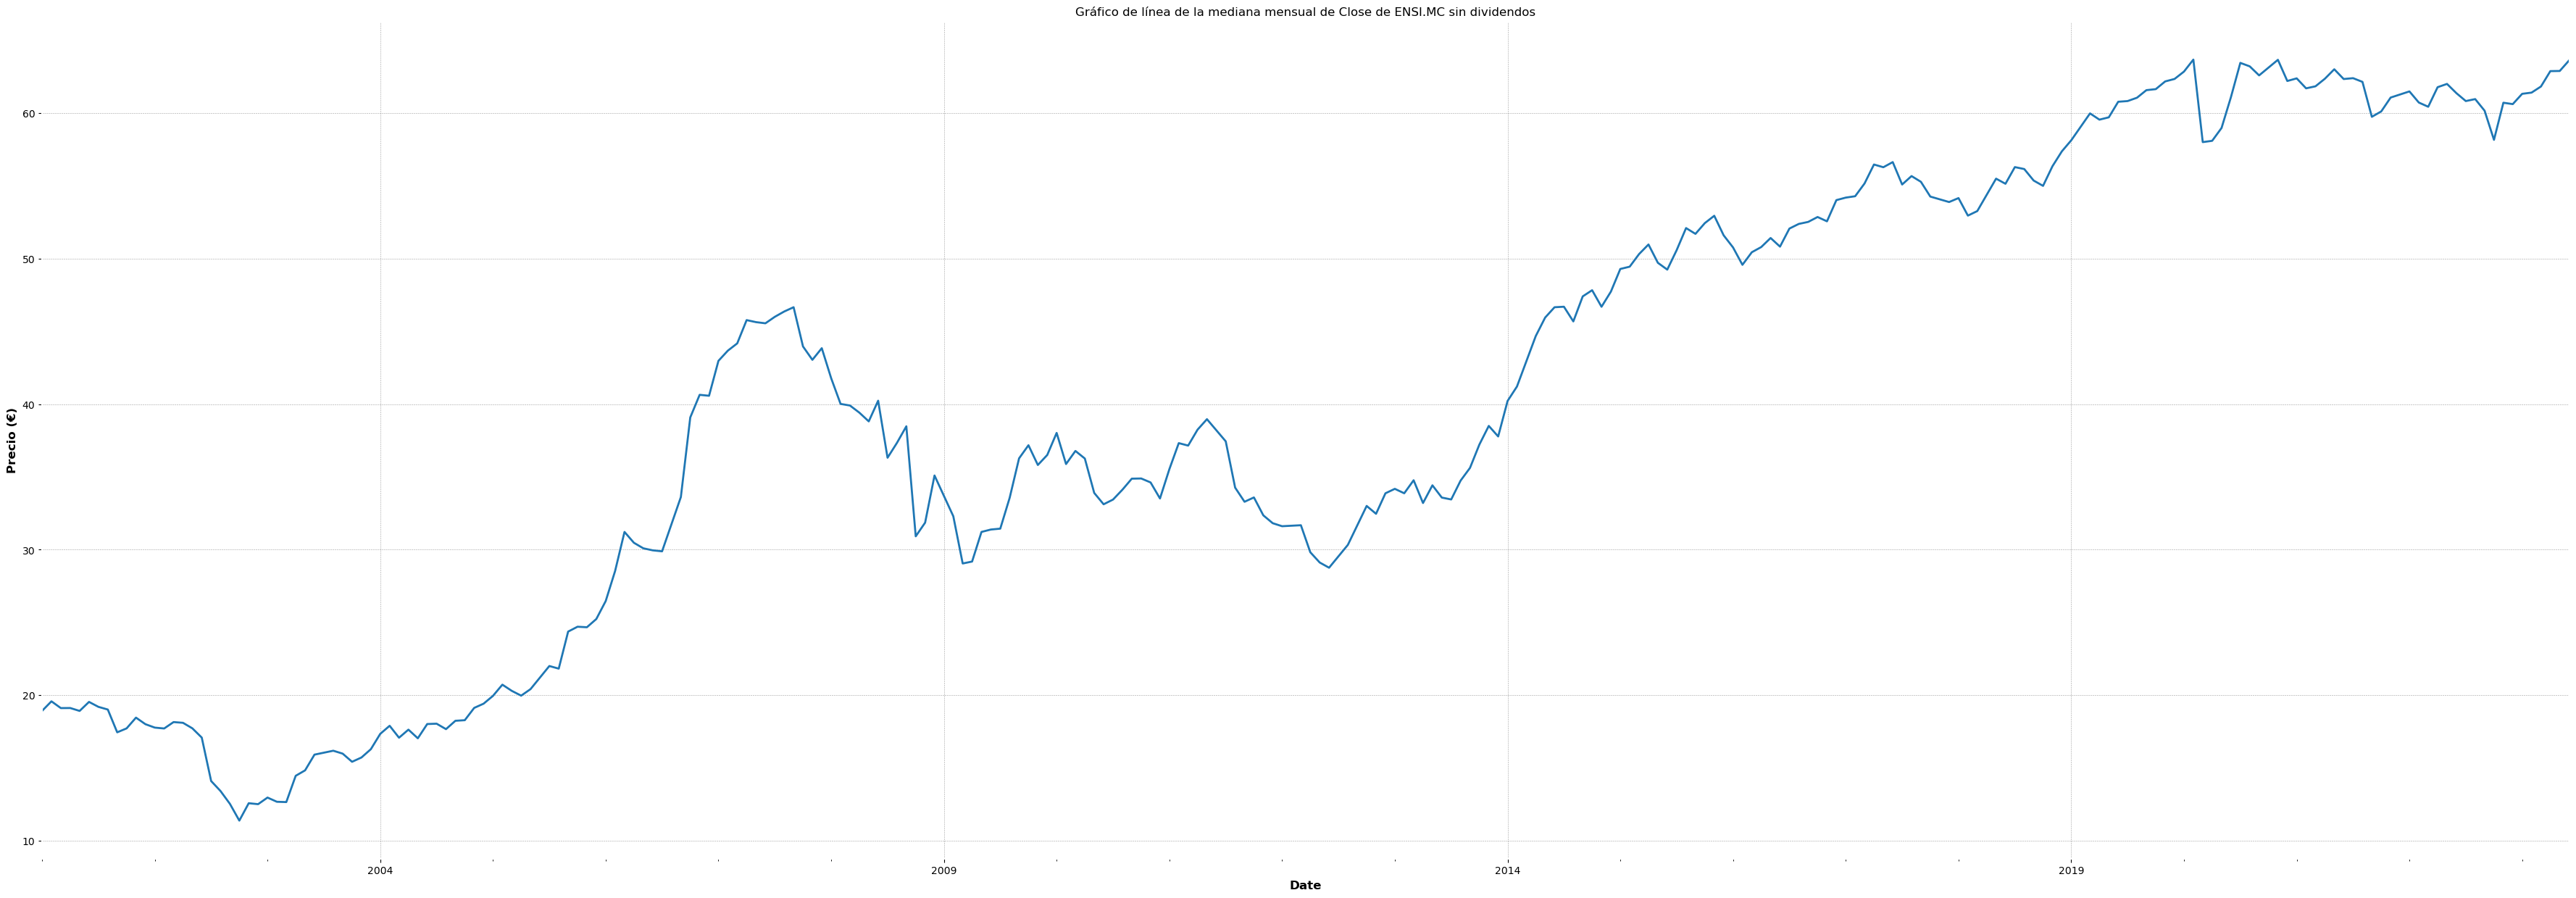

In [19]:
fechas_str = [ts.strftime('%Y-%m-%d') for ts in dividendos.index.tolist()]

plt.figure(figsize=(45,15))
ax = cotizacion_mensual['Close'].plot(title='Gráfico de línea de la mediana mensual de Close de ENSI.MC sin dividendos', ylabel='Precio (€)')

plt.show()

## Se propone:
Probar dos métodos de predicción de serie temporal que predigan el precio de la acción 12 meses más adelante de la última fecha conocida (mes del 2023-06)

## XGBoost Regressor con Cross Validation e hiperparametrización

Preparamos el dataframe obteniendo 'lags', es decir, pasos para atrás y mantenemos la columna "Close" como variable independiente.

In [20]:
num_lags = 20
for lag in range(1, num_lags + 1):
    cotizacion_mensual[f'lag_{lag}'] = cotizacion_mensual['Close'].shift(lag)

cotizacion_mensual = cotizacion_mensual.dropna()

In [21]:
cotizacion_mensual.head()

Close    lag_1    lag_2    lag_3      lag_4      lag_5  \
Date                                                                   
2002-09-30  12.5325  13.4125  14.1025  17.0890  17.723999  18.104001   
2002-10-31  11.3825  12.5325  13.4125  14.1025  17.089000  17.723999   
2002-11-30  12.5775  11.3825  12.5325  13.4125  14.102500  17.089000   
2002-12-31  12.5125  12.5775  11.3825  12.5325  13.412500  14.102500   
2003-01-31  12.9665  12.5125  12.5775  11.3825  12.532500  13.412500   

                lag_6      lag_7      lag_8      lag_9  ...     lag_11  \
Date                                                    ...              
2002-09-30  18.154000  17.713999  17.774001  18.010000  ...  17.720000   
2002-10-31  18.104001  18.154000  17.713999  17.774001  ...  18.460000   
2002-11-30  17.723999  18.104001  18.154000  17.713999  ...  18.010000   
2002-12-31  17.089000  17.723999  18.104001  18.154000  ...  17.774001   
2003-01-31  14.102500  17.089000  17.723999  18.104001  ...  17.713999   

               lag_12     lag_13     lag_14     lag_15     lag_16     lag_17  \
Date                                                                           
2002-09-30  17.449999  19.015000  19.199999  19.539999  18.920000  19.119999   
2002-10-31  17.720000  17.449999  19.015000  19.199999  19.539999  18.920000   
2002-11-30  18.460000  17.720000  17.449999  19.015000  19.199999  19.539999   
2002-12-31  18.010000  18.460000  17.720000  17.449999  19.015000  19.199999   
2003-01-31  17.774001  18.010000  18.460000  17.720000  17.449999  19.015000   

               lag_18     lag_19     lag_20  
Date                                         
2002-09-30  19.115000  19.580000  18.920000  
2002-10-31  19.119999  19.115000  19.580000  
2002-11-30  18.920000  19.119999  19.115000  
2002-12-31  19.539999  18.920000  19.119999  
2003-01-31  19.199999  19.539999  18.920000  

[5 rows x 21 columns]

### Creamos ventanas para la cross validation, que utilizaremos más adelante en la prueba de otros modelos

In [22]:
#tscv = TimeSeriesSplit(n_splits=5) # No personaliza suficientemente los cortes

def custom_time_series_split(df, train_months, test_months):
    ventanas = []
    
    total_months = train_months + test_months
    
    n_splits = int((len(df) - train_months) / test_months)
    
    for split in range(n_splits):
        start_train = split * test_months
        end_train = start_train + train_months
        
        start_test = end_train
        end_test = start_test + test_months
        
        if end_test > len(df):
            end_test = len(df)
        
        ventanas.append((
            df.index[start_train],
            df.index[end_train - 1], 
            df.index[start_test],
            df.index[end_test - 1] ))
    
    return ventanas

train_months = 36
test_months = 12

ventanas = custom_time_series_split(cotizacion_mensual, train_months, test_months)

for i, ventana in enumerate(ventanas):
    print(f"Ventana {i}: {[timest.strftime('%Y-%m-%d') for timest in ventana]}")

Ventana 0: ['2002-09-30', '2005-08-31', '2005-09-30', '2006-08-31']
Ventana 1: ['2003-09-30', '2006-08-31', '2006-09-30', '2007-08-31']
Ventana 2: ['2004-09-30', '2007-08-31', '2007-09-30', '2008-08-31']
Ventana 3: ['2005-09-30', '2008-08-31', '2008-09-30', '2009-08-31']
Ventana 4: ['2006-09-30', '2009-08-31', '2009-09-30', '2010-08-31']
Ventana 5: ['2007-09-30', '2010-08-31', '2010-09-30', '2011-08-31']
Ventana 6: ['2008-09-30', '2011-08-31', '2011-09-30', '2012-08-31']
Ventana 7: ['2009-09-30', '2012-08-31', '2012-09-30', '2013-08-31']
Ventana 8: ['2010-09-30', '2013-08-31', '2013-09-30', '2014-08-31']
Ventana 9: ['2011-09-30', '2014-08-31', '2014-09-30', '2015-08-31']
Ventana 10: ['2012-09-30', '2015-08-31', '2015-09-30', '2016-08-31']
Ventana 11: ['2013-09-30', '2016-08-31', '2016-09-30', '2017-08-31']
Ventana 12: ['2014-09-30', '2017-08-31', '2017-09-30', '2018-08-31']
Ventana 13: ['2015-09-30', '2018-08-31', '2018-09-30', '2019-08-31']
Ventana 14: ['2016-09-30', '2019-08-31', '20

Obtenemos 30 combinaciones distintas para la búsqueda, dentro del marco definido en 'space'

In [23]:
space = {
    'max_depth': hp.choice('max_depth', np.arange(3, 10, dtype=int)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.uniform('subsample', 0.6, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 100),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.2)
}

samples = [sample(space) for _ in range(30)]

for sample_ in samples:
    sample_['max_depth'] = int(sample_['max_depth'])
    sample_['min_child_weight'] = int(sample_['min_child_weight'])
    sample_['n_estimators'] = int(sample_['n_estimators'])

for i, params in enumerate(samples):
    print(f"Sample {i+1}: {params}")

Sample 1: {'learning_rate': 0.16641910935709014, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8480975562886519}
Sample 2: {'learning_rate': 0.17169412272573742, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9288796186347266}
Sample 3: {'learning_rate': 0.19516598887334313, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.8276635184881016}
Sample 4: {'learning_rate': 0.1282900409440027, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.8748419873566524}
Sample 5: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Sample 6: {'learning_rate': 0.18990237365327778, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8133309015535601}
Sample 7: {'learning_rate': 0.08566207896193731, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6210736406890162}
Sample 

In [24]:
lags = [5, 10, 20]

resultados_xgb = []
for start_train_date, end_train_date, start_test_date, end_test_date in ventanas:
    for hyper in samples:
        for lg in lags:
            print(f"Probamos con Train desde {start_train_date} hasta {end_train_date} y con Test desde {start_test_date} hasta {end_test_date}")
            print(f"Con {lg} lags.")
            print(f"Con los siguientes hiperparámetros: {hyper}")

            train = cotizacion_mensual[(cotizacion_mensual.index >= start_train_date) & (cotizacion_mensual.index <= end_train_date)]
            test = cotizacion_mensual[(cotizacion_mensual.index > end_train_date) & (cotizacion_mensual.index <= end_test_date)]

            X_train, y_train = train.drop('Close', axis=1), train['Close']
            X_test, y_test = test.drop('Close', axis=1), test['Close'].tolist()
            
            X_train = X_train[X_train.columns[:lg]]
            X_test = X_test[X_test.columns[:lg]]

            model = xgb.XGBRegressor(**hyper)
            model.fit(X_train, y_train)

            preds = model.predict(X_test)
            mse = mean_squared_error(y_test, preds)
            print(f"Obteniendo un MSE de: {mse}")
            print("*"*50)

            iteracion = {
                'start_train_date': start_train_date, 
                'end_train_date': end_train_date, 
                'start_test_date': start_test_date, 
                'end_test_date': end_test_date,
                'lags': lg,
                'hyper': hyper,
                'real': y_test,
                'preds': preds,
                'mse': mse 
            }
            resultados_xgb.append(iteracion)

resultados_xgb = pd.DataFrame(resultados_xgb)

Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16641910935709014, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8480975562886519}
Obteniendo un MSE de: 56.70494291162609
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16641910935709014, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8480975562886519}
Obteniendo un MSE de: 47.13074960078553
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'lear

Obteniendo un MSE de: 51.9991599243497
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16932913956746543, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.8120835609071293}
Obteniendo un MSE de: 52.04534277419171
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16932913956746543, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.8120835609071293}
Obteniendo un MSE de: 46.790404146897366
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30

Obteniendo un MSE de: 60.259247078521646
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06637757487725565, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6465022778829635}
Obteniendo un MSE de: 45.139001137738205
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06637757487725565, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6465022778829635}
Obteniendo un MSE de: 45.70205021659825
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-

Obteniendo un MSE de: 54.04441822226094
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14197969085159384, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.9674032489040755}
Obteniendo un MSE de: 58.990313779088275
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14197969085159384, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.9674032489040755}
Obteniendo un MSE de: 46.502755304645355
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-

Obteniendo un MSE de: 53.55276693569837
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15154446024792112, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7586972350490817}
Obteniendo un MSE de: 47.31332317769617
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-30 00:00:00 hasta 2006-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15154446024792112, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7586972350490817}
Obteniendo un MSE de: 45.865597007216024
**************************************************
Probamos con Train desde 2002-09-30 00:00:00 hasta 2005-08-31 00:00:00 y con Test desde 2005-09-3

Obteniendo un MSE de: 154.52025580930328
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09-30 00:00:00 hasta 2007-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16932913956746543, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.8120835609071293}
Obteniendo un MSE de: 174.35047547163472
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09-30 00:00:00 hasta 2007-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16932913956746543, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.8120835609071293}
Obteniendo un MSE de: 174.29066720243938
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09

Obteniendo un MSE de: 165.7635698980408
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09-30 00:00:00 hasta 2007-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06637757487725565, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6465022778829635}
Obteniendo un MSE de: 178.6204056861375
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09-30 00:00:00 hasta 2007-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06637757487725565, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6465022778829635}
Obteniendo un MSE de: 172.30740597085477
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09-3

Obteniendo un MSE de: 167.19135452006924
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09-30 00:00:00 hasta 2007-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14197969085159384, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.9674032489040755}
Obteniendo un MSE de: 167.2262967533069
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09-30 00:00:00 hasta 2007-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14197969085159384, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.9674032489040755}
Obteniendo un MSE de: 167.36004183946926
**************************************************
Probamos con Train desde 2003-09-30 00:00:00 hasta 2006-08-31 00:00:00 y con Test desde 2006-09

Obteniendo un MSE de: 9.571831498865736
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 00:00:00 hasta 2008-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.17169412272573742, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9288796186347266}
Obteniendo un MSE de: 9.621172070316595
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 00:00:00 hasta 2008-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.17169412272573742, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9288796186347266}
Obteniendo un MSE de: 10.529565611995146
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-

Obteniendo un MSE de: 11.999972556198585
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 00:00:00 hasta 2008-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.18026707004781728, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.858670048109089}
Obteniendo un MSE de: 11.273326910157175
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 00:00:00 hasta 2008-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.10893774440733175, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.7440705099538294}
Obteniendo un MSE de: 10.015950313024586
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-

Obteniendo un MSE de: 10.502401227276495
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 00:00:00 hasta 2008-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06637757487725565, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6465022778829635}
Obteniendo un MSE de: 10.414539817529102
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 00:00:00 hasta 2008-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.19620612210576555, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 400, 'subsample': 0.9647365785368756}
Obteniendo un MSE de: 9.726819121657
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 

Obteniendo un MSE de: 16.373495870851382
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 00:00:00 hasta 2008-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06663802248029241, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9448813058062155}
Obteniendo un MSE de: 9.053327507699711
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-30 00:00:00 hasta 2008-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06663802248029241, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9448813058062155}
Obteniendo un MSE de: 9.038619615775813
**************************************************
Probamos con Train desde 2004-09-30 00:00:00 hasta 2007-08-31 00:00:00 y con Test desde 2007-09-3

Obteniendo un MSE de: 14.896535903888141
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-30 00:00:00 hasta 2009-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16641910935709014, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8480975562886519}
Obteniendo un MSE de: 12.625198260990475
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-30 00:00:00 hasta 2009-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.17169412272573742, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9288796186347266}
Obteniendo un MSE de: 14.274669109033075
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09

Obteniendo un MSE de: 14.935170526857798
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-30 00:00:00 hasta 2009-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.18026707004781728, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.858670048109089}
Obteniendo un MSE de: 15.70291002499715
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-30 00:00:00 hasta 2009-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.18026707004781728, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.858670048109089}
Obteniendo un MSE de: 17.855753000737725
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-3

Obteniendo un MSE de: 16.24043700902392
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-30 00:00:00 hasta 2009-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.19620612210576555, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 400, 'subsample': 0.9647365785368756}
Obteniendo un MSE de: 15.237077292355005
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-30 00:00:00 hasta 2009-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.19620612210576555, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 400, 'subsample': 0.9647365785368756}
Obteniendo un MSE de: 12.800450147515077
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-

Obteniendo un MSE de: 14.67327972651018
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-30 00:00:00 hasta 2009-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06663802248029241, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9448813058062155}
Obteniendo un MSE de: 14.658009630934602
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-30 00:00:00 hasta 2009-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.09972884042877103, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.6578490754263783}
Obteniendo un MSE de: 16.30100919750223
**************************************************
Probamos con Train desde 2005-09-30 00:00:00 hasta 2008-08-31 00:00:00 y con Test desde 2008-09-3

Obteniendo un MSE de: 6.937322395761331
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30 00:00:00 hasta 2010-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.17169412272573742, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9288796186347266}
Obteniendo un MSE de: 2.6595269059367443
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30 00:00:00 hasta 2010-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.17169412272573742, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9288796186347266}
Obteniendo un MSE de: 6.663299318611056
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-

Obteniendo un MSE de: 8.635655333002527
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30 00:00:00 hasta 2010-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.18026707004781728, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.858670048109089}
Obteniendo un MSE de: 1.928320855775065
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30 00:00:00 hasta 2010-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.18026707004781728, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.858670048109089}
Obteniendo un MSE de: 16.074769643139323
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30

Obteniendo un MSE de: 1.358708246566161
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30 00:00:00 hasta 2010-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.19620612210576555, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 400, 'subsample': 0.9647365785368756}
Obteniendo un MSE de: 12.957855934713264
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30 00:00:00 hasta 2010-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.12282436667667598, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7274782612712665}
Obteniendo un MSE de: 4.421053180105873
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-3

Obteniendo un MSE de: 11.345595051817833
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30 00:00:00 hasta 2010-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.09972884042877103, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.6578490754263783}
Obteniendo un MSE de: 5.402854402601377
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-30 00:00:00 hasta 2010-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.09972884042877103, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.6578490754263783}
Obteniendo un MSE de: 1.9629727800730297
**************************************************
Probamos con Train desde 2006-09-30 00:00:00 hasta 2009-08-31 00:00:00 y con Test desde 2009-09-

Obteniendo un MSE de: 3.149161364559864
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30 00:00:00 hasta 2011-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.17169412272573742, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9288796186347266}
Obteniendo un MSE de: 2.4587149839900295
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30 00:00:00 hasta 2011-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.17169412272573742, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9288796186347266}
Obteniendo un MSE de: 3.4227107212926113
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-

Obteniendo un MSE de: 3.0010075127787204
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30 00:00:00 hasta 2011-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.10893774440733175, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.7440705099538294}
Obteniendo un MSE de: 4.3261346796860645
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30 00:00:00 hasta 2011-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.10893774440733175, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.7440705099538294}
Obteniendo un MSE de: 2.864891708294536
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09

Obteniendo un MSE de: 2.7416802371740894
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30 00:00:00 hasta 2011-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.12282436667667598, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7274782612712665}
Obteniendo un MSE de: 3.018780820705732
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30 00:00:00 hasta 2011-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.12282436667667598, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7274782612712665}
Obteniendo un MSE de: 3.879443793710935
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-3

Obteniendo un MSE de: 4.568658664279629
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30 00:00:00 hasta 2011-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 3.629322358448121
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30 00:00:00 hasta 2011-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 2.0948557575864726
**************************************************
Probamos con Train desde 2007-09-30 00:00:00 hasta 2010-08-31 00:00:00 y con Test desde 2010-09-30

Obteniendo un MSE de: 5.737199504470958
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 00:00:00 hasta 2012-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1282900409440027, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.8748419873566524}
Obteniendo un MSE de: 14.142331824918235
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 00:00:00 hasta 2012-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 3.04341655627324
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 

Obteniendo un MSE de: 13.207729025476532
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 00:00:00 hasta 2012-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 3.2405179590532462
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 00:00:00 hasta 2012-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 4.954055278876043
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-

Obteniendo un MSE de: 8.569362961854898
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 00:00:00 hasta 2012-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 2.153864168687798
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 00:00:00 hasta 2012-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 4.001530757172361
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30

Obteniendo un MSE de: 5.670187326079105
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 00:00:00 hasta 2012-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 11.726754231523769
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30 00:00:00 hasta 2012-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 2.580129505228761
**************************************************
Probamos con Train desde 2008-09-30 00:00:00 hasta 2011-08-31 00:00:00 y con Test desde 2011-09-30

Obteniendo un MSE de: 1.3272807833338744
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30 00:00:00 hasta 2013-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 1.1770191211612075
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30 00:00:00 hasta 2013-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 2.4681366701773704
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09

Obteniendo un MSE de: 1.1934311417613446
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30 00:00:00 hasta 2013-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 1.5301542605743395
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30 00:00:00 hasta 2013-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 3.0798819089295386
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09

Obteniendo un MSE de: 2.901522641087468
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30 00:00:00 hasta 2013-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16055094839130735, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6058676553299572}
Obteniendo un MSE de: 1.154124965268703
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30 00:00:00 hasta 2013-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 1.539850693074823
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30

Obteniendo un MSE de: 1.6520253016996003
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30 00:00:00 hasta 2013-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 2.1385390252012892
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-30 00:00:00 hasta 2013-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 1.049420368442506
**************************************************
Probamos con Train desde 2009-09-30 00:00:00 hasta 2012-08-31 00:00:00 y con Test desde 2012-09-3

Obteniendo un MSE de: 48.479578161052096
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 00:00:00 hasta 2014-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1282900409440027, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.8748419873566524}
Obteniendo un MSE de: 50.618044397519384
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 00:00:00 hasta 2014-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1282900409440027, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.8748419873566524}
Obteniendo un MSE de: 55.461080992616935
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-

Obteniendo un MSE de: 49.05391253589278
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 00:00:00 hasta 2014-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14795236812721674, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7738712713921517}
Obteniendo un MSE de: 48.61234866686751
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 00:00:00 hasta 2014-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 41.58298307735438
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30

Obteniendo un MSE de: 54.3974096369485
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 00:00:00 hasta 2014-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16055094839130735, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6058676553299572}
Obteniendo un MSE de: 43.311489423225545
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 00:00:00 hasta 2014-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.16055094839130735, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6058676553299572}
Obteniendo un MSE de: 47.40639322483624
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30

Obteniendo un MSE de: 52.548631738959365
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 00:00:00 hasta 2014-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.147055580394587, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6378134836589506}
Obteniendo un MSE de: 54.44169470264316
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 00:00:00 hasta 2014-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.147055580394587, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6378134836589506}
Obteniendo un MSE de: 54.20718082943767
**************************************************
Probamos con Train desde 2010-09-30 00:00:00 hasta 2013-08-31 00:00:00 y con Test desde 2013-09-30 0

Obteniendo un MSE de: 11.040357002931822
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-30 00:00:00 hasta 2015-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.19516598887334313, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.8276635184881016}
Obteniendo un MSE de: 14.409140649220783
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-30 00:00:00 hasta 2015-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.19516598887334313, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.8276635184881016}
Obteniendo un MSE de: 20.51752144263983
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09

Obteniendo un MSE de: 11.066270170669563
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-30 00:00:00 hasta 2015-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14795236812721674, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7738712713921517}
Obteniendo un MSE de: 15.150655190909454
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-30 00:00:00 hasta 2015-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14795236812721674, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7738712713921517}
Obteniendo un MSE de: 27.410732066537594
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-0

Obteniendo un MSE de: 11.13116592469125
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-30 00:00:00 hasta 2015-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.12282436667667598, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7274782612712665}
Obteniendo un MSE de: 14.739098004236482
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-30 00:00:00 hasta 2015-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.12282436667667598, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7274782612712665}
Obteniendo un MSE de: 24.760123079398213
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09

Obteniendo un MSE de: 20.71281040063597
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-30 00:00:00 hasta 2015-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.09972884042877103, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.6578490754263783}
Obteniendo un MSE de: 13.615315260371462
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-30 00:00:00 hasta 2015-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.09972884042877103, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.6578490754263783}
Obteniendo un MSE de: 25.53772699699877
**************************************************
Probamos con Train desde 2011-09-30 00:00:00 hasta 2014-08-31 00:00:00 y con Test desde 2014-09-

Obteniendo un MSE de: 0.8520107654720134
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-30 00:00:00 hasta 2016-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.19516598887334313, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.8276635184881016}
Obteniendo un MSE de: 2.038087238643634
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-30 00:00:00 hasta 2016-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.19516598887334313, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.8276635184881016}
Obteniendo un MSE de: 0.9736956906485256
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-

Obteniendo un MSE de: 0.8604776475446299
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-30 00:00:00 hasta 2016-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.10893774440733175, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.7440705099538294}
Obteniendo un MSE de: 3.034297250145709
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-30 00:00:00 hasta 2016-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.10893774440733175, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.7440705099538294}
Obteniendo un MSE de: 1.314962082883712
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-3

Obteniendo un MSE de: 1.0891502241241882
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-30 00:00:00 hasta 2016-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.12282436667667598, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7274782612712665}
Obteniendo un MSE de: 2.922320146359109
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-30 00:00:00 hasta 2016-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.12282436667667598, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7274782612712665}
Obteniendo un MSE de: 1.4129904736149463
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-

Obteniendo un MSE de: 3.7705511309426796
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-30 00:00:00 hasta 2016-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 1.169564277627564
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-30 00:00:00 hasta 2016-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 0.8427014269650067
**************************************************
Probamos con Train desde 2012-09-30 00:00:00 hasta 2015-08-31 00:00:00 y con Test desde 2015-09-3

Obteniendo un MSE de: 14.736220670782634
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-30 00:00:00 hasta 2017-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 12.692996630355516
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-30 00:00:00 hasta 2017-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 14.658295278925104
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09

Obteniendo un MSE de: 12.663908120468136
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-30 00:00:00 hasta 2017-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06875579756219115, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6992809487853681}
Obteniendo un MSE de: 15.259698092988243
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-30 00:00:00 hasta 2017-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06875579756219115, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6992809487853681}
Obteniendo un MSE de: 14.031408320546026
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-0

Obteniendo un MSE de: 15.492714220353447
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-30 00:00:00 hasta 2017-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 17.45157635433031
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-30 00:00:00 hasta 2017-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1755496631570485, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9413773923699095}
Obteniendo un MSE de: 19.004072146910627
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-3

Obteniendo un MSE de: 16.448782359601644
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-30 00:00:00 hasta 2017-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 11.106600054868567
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09-30 00:00:00 hasta 2017-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 16.905493536501744
**************************************************
Probamos con Train desde 2013-09-30 00:00:00 hasta 2016-08-31 00:00:00 y con Test desde 2016-09

Obteniendo un MSE de: 0.912699642886972
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-30 00:00:00 hasta 2018-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 1.037959372553241
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-30 00:00:00 hasta 2018-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 0.864816358068417
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-3

Obteniendo un MSE de: 0.9577995316804749
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-30 00:00:00 hasta 2018-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06875579756219115, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6992809487853681}
Obteniendo un MSE de: 0.7223683584702001
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-30 00:00:00 hasta 2018-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06886576893327022, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.6639127642633367}
Obteniendo un MSE de: 1.1417940699584779
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09

Obteniendo un MSE de: 0.7379989832769162
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-30 00:00:00 hasta 2018-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 1.0653562602013553
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-30 00:00:00 hasta 2018-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1755496631570485, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9413773923699095}
Obteniendo un MSE de: 0.932522847133089
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-3

Obteniendo un MSE de: 0.7029240202184939
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-30 00:00:00 hasta 2018-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 1.4718710825077457
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-30 00:00:00 hasta 2018-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 0.7886790814010011
**************************************************
Probamos con Train desde 2014-09-30 00:00:00 hasta 2017-08-31 00:00:00 y con Test desde 2017-09-

Obteniendo un MSE de: 15.886439346121298
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-30 00:00:00 hasta 2019-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.18990237365327778, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8133309015535601}
Obteniendo un MSE de: 20.162321675908768
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-30 00:00:00 hasta 2019-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.18990237365327778, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8133309015535601}
Obteniendo un MSE de: 16.79509337865309
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09

Obteniendo un MSE de: 14.905474449449306
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-30 00:00:00 hasta 2019-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06886576893327022, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.6639127642633367}
Obteniendo un MSE de: 17.151228269948135
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-30 00:00:00 hasta 2019-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06886576893327022, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.6639127642633367}
Obteniendo un MSE de: 20.210118028609642
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09

Obteniendo un MSE de: 15.219640044990934
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-30 00:00:00 hasta 2019-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1755496631570485, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9413773923699095}
Obteniendo un MSE de: 16.289935279921924
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-30 00:00:00 hasta 2019-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1755496631570485, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9413773923699095}
Obteniendo un MSE de: 19.077055448183895
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-3

Obteniendo un MSE de: 14.64326644635233
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-30 00:00:00 hasta 2019-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 16.985428747683205
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-30 00:00:00 hasta 2019-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 19.512734530896886
**************************************************
Probamos con Train desde 2015-09-30 00:00:00 hasta 2018-08-31 00:00:00 y con Test desde 2018-09-

Obteniendo un MSE de: 3.77490711079696
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 00:00:00 hasta 2020-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 4.815714149698274
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 00:00:00 hasta 2020-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 4.573610091089151
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 

Obteniendo un MSE de: 3.8004192073185465
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 00:00:00 hasta 2020-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 4.911178659899
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 00:00:00 hasta 2020-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 4.397861183619926
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 0

Obteniendo un MSE de: 6.162470472109313
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 00:00:00 hasta 2020-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 4.195129580988479
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 00:00:00 hasta 2020-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 3.554327873871839
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30

Obteniendo un MSE de: 3.669850496199357
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 00:00:00 hasta 2020-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 4.359640606155721
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 00:00:00 hasta 2020-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 4.140607464582739
**************************************************
Probamos con Train desde 2016-09-30 00:00:00 hasta 2019-08-31 00:00:00 y con Test desde 2019-09-30 

Obteniendo un MSE de: 0.22781114127989074
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 00:00:00 hasta 2021-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 3.9816526156997103
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 00:00:00 hasta 2021-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 4.090222574350938
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09

Obteniendo un MSE de: 5.212428425068633
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 00:00:00 hasta 2021-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 2.099225660213659
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 00:00:00 hasta 2021-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06875579756219115, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6992809487853681}
Obteniendo un MSE de: 4.37086966674219
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 

Obteniendo un MSE de: 4.730100246831828
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 00:00:00 hasta 2021-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 1.4049796975031699
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 00:00:00 hasta 2021-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1755496631570485, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9413773923699095}
Obteniendo un MSE de: 4.12216135822885
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 

Obteniendo un MSE de: 3.918704214038568
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 00:00:00 hasta 2021-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 0.6897513203138078
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30 00:00:00 hasta 2021-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 4.469332203979683
**************************************************
Probamos con Train desde 2017-09-30 00:00:00 hasta 2020-08-31 00:00:00 y con Test desde 2020-09-30

Obteniendo un MSE de: 2.056295559565058
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30 00:00:00 hasta 2022-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1282900409440027, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.8748419873566524}
Obteniendo un MSE de: 4.673313726463843
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30 00:00:00 hasta 2022-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}
Obteniendo un MSE de: 0.8915001712999561
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30

Obteniendo un MSE de: 0.9715167079560564
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30 00:00:00 hasta 2022-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 2.2323776016355747
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30 00:00:00 hasta 2022-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.06838424922104341, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9731491875107993}
Obteniendo un MSE de: 2.864610798300301
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09

Obteniendo un MSE de: 3.050026607680182
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30 00:00:00 hasta 2022-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 0.8260146580319572
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30 00:00:00 hasta 2022-08-31 00:00:00
Con 10 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.15742852159588888, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.9792101478247632}
Obteniendo un MSE de: 2.498157975159021
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-3

Obteniendo un MSE de: 2.1040081384875706
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30 00:00:00 hasta 2022-08-31 00:00:00
Con 20 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.1723108444080298, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.8402411042970528}
Obteniendo un MSE de: 2.643081863927829
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-30 00:00:00 hasta 2022-08-31 00:00:00
Con 5 lags.
Con los siguientes hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}
Obteniendo un MSE de: 1.2540071955429448
**************************************************
Probamos con Train desde 2018-09-30 00:00:00 hasta 2021-08-31 00:00:00 y con Test desde 2021-09-3

In [25]:
resultados_xgb.head()

start_train_date end_train_date start_test_date end_test_date  lags  \
0       2002-09-30     2005-08-31      2005-09-30    2006-08-31     5   
1       2002-09-30     2005-08-31      2005-09-30    2006-08-31    10   
2       2002-09-30     2005-08-31      2005-09-30    2006-08-31    20   
3       2002-09-30     2005-08-31      2005-09-30    2006-08-31     5   
4       2002-09-30     2005-08-31      2005-09-30    2006-08-31    10   

                                               hyper  \
0  {'learning_rate': 0.16641910935709014, 'max_de...   
1  {'learning_rate': 0.16641910935709014, 'max_de...   
2  {'learning_rate': 0.16641910935709014, 'max_de...   
3  {'learning_rate': 0.17169412272573742, 'max_de...   
4  {'learning_rate': 0.17169412272573742, 'max_de...   

                                                real  \
0  [24.371199961853026, 24.7062, 24.6712001525878...   
1  [24.371199961853026, 24.7062, 24.6712001525878...   
2  [24.371199961853026, 24.7062, 24.6712001525878...   
3  [24.371199961853026, 24.7062, 24.6712001525878...   
4  [24.371199961853026, 24.7062, 24.6712001525878...   

                                               preds        mse  
0  [21.09575, 21.09575, 21.09575, 21.09575, 21.09...  56.704943  
1  [21.813812, 21.813812, 21.813812, 21.813812, 2...  47.130750  
2  [21.656593, 21.826174, 21.836142, 21.85313, 21...  57.305538  
3  [21.801603, 21.801603, 21.801603, 21.801603, 2...  47.284918  
4  [21.922392, 21.922392, 21.922392, 21.922392, 2...  45.772771

### Las mejores gráficas resultantes para cada rango de fechas es el siguiente:

Índice: 13
Fecha de inicio de TEST: 2005-09-30 00:00:00
Fecha de finalización de TEST: 2006-08-31 00:00:00
Lags utilizados: 10
MSE más bajo: 44.28621017649334
Hiperparámetros: {'learning_rate': 0.14914302394765203, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8204749455349923}


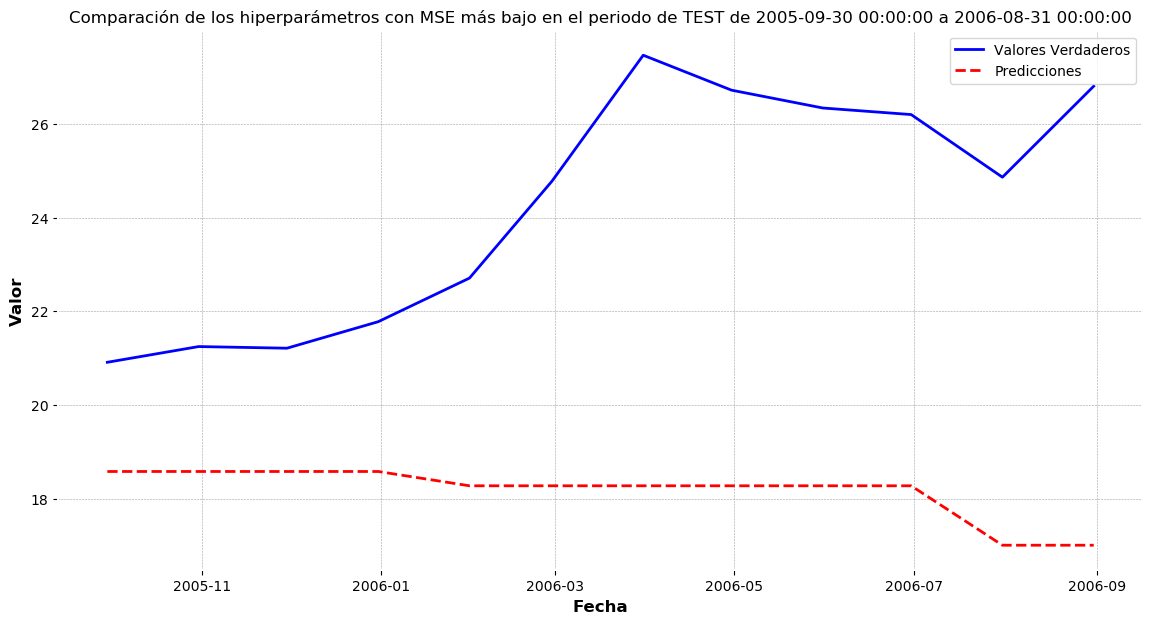

**************************************************
Índice: 152
Fecha de inicio de TEST: 2006-09-30 00:00:00
Fecha de finalización de TEST: 2007-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 142.61728004343078
Hiperparámetros: {'learning_rate': 0.1755496631570485, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9413773923699095}


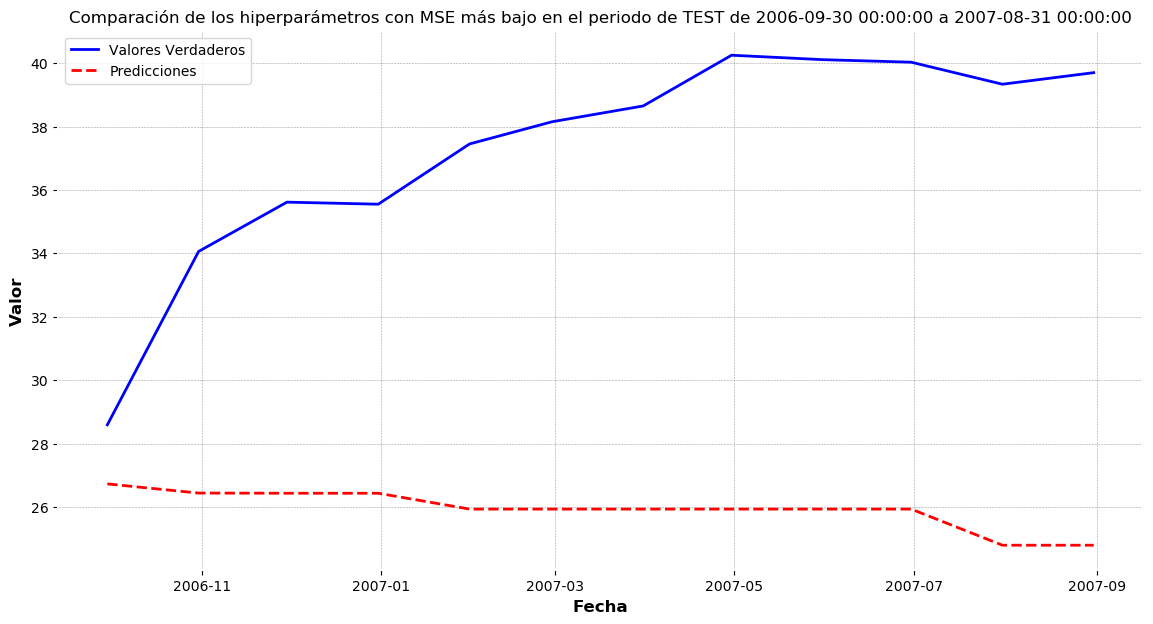

**************************************************
Índice: 210
Fecha de inicio de TEST: 2007-09-30 00:00:00
Fecha de finalización de TEST: 2008-08-31 00:00:00
Lags utilizados: 5
MSE más bajo: 7.5347266774967885
Hiperparámetros: {'learning_rate': 0.14795236812721674, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7738712713921517}


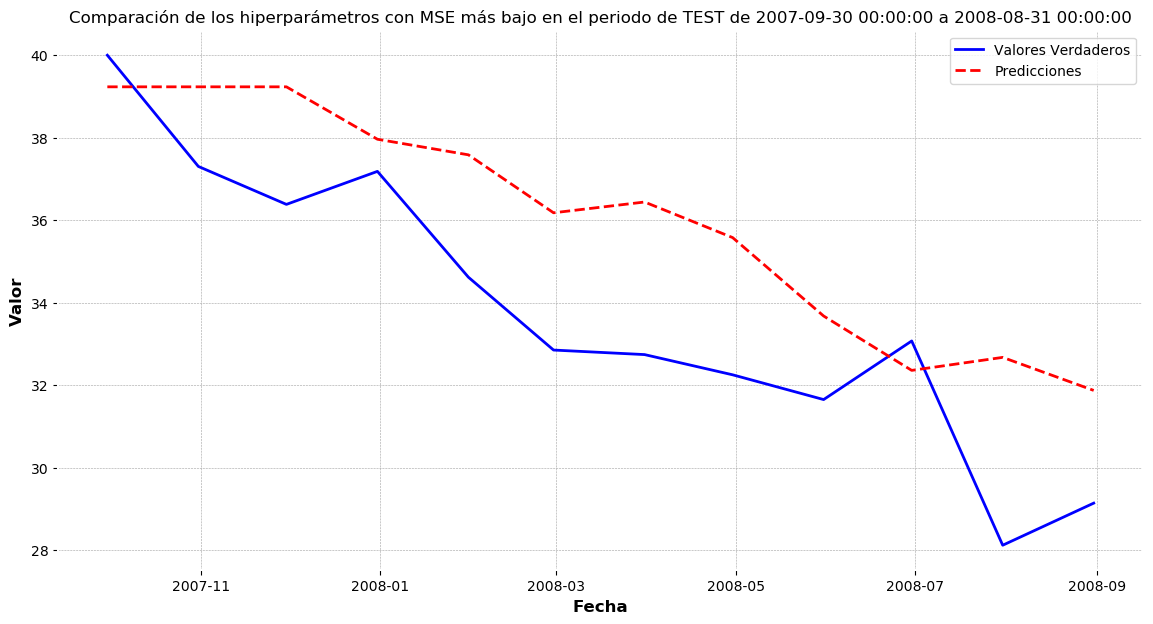

**************************************************
Índice: 338
Fecha de inicio de TEST: 2008-09-30 00:00:00
Fecha de finalización de TEST: 2009-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 9.050004747635581
Hiperparámetros: {'learning_rate': 0.14197969085159384, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 300, 'subsample': 0.9674032489040755}


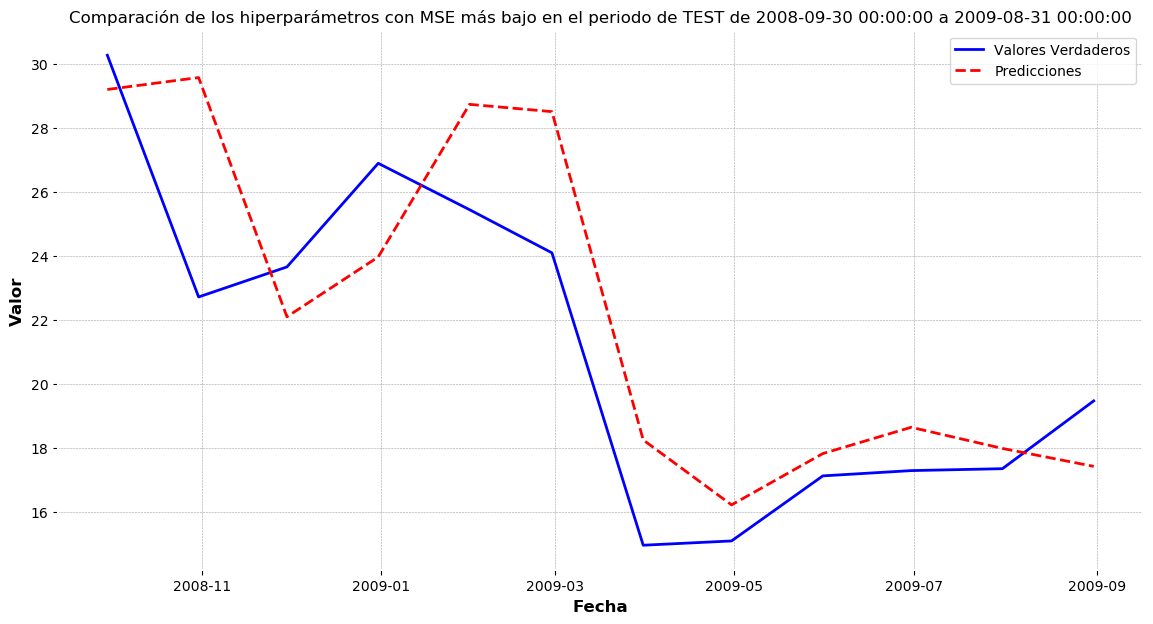

**************************************************
Índice: 379
Fecha de inicio de TEST: 2009-09-30 00:00:00
Fecha de finalización de TEST: 2010-08-31 00:00:00
Lags utilizados: 10
MSE más bajo: 0.9229394206010996
Hiperparámetros: {'learning_rate': 0.08566207896193731, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6210736406890162}


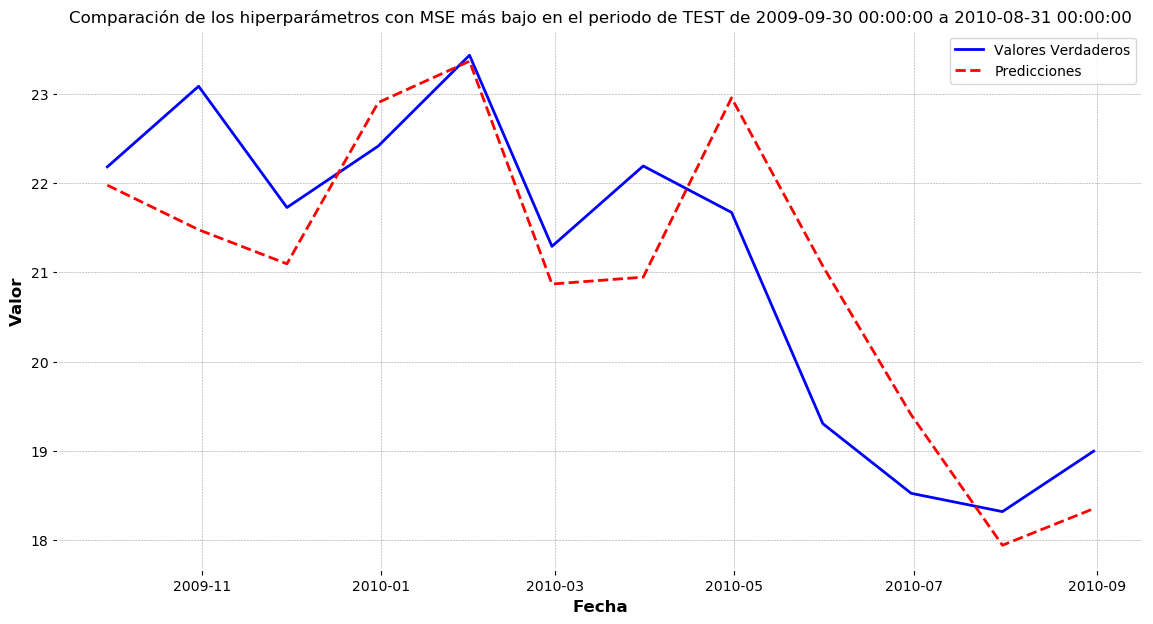

**************************************************
Índice: 510
Fecha de inicio de TEST: 2010-09-30 00:00:00
Fecha de finalización de TEST: 2011-08-31 00:00:00
Lags utilizados: 5
MSE más bajo: 1.5663242899007888
Hiperparámetros: {'learning_rate': 0.1755496631570485, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9413773923699095}


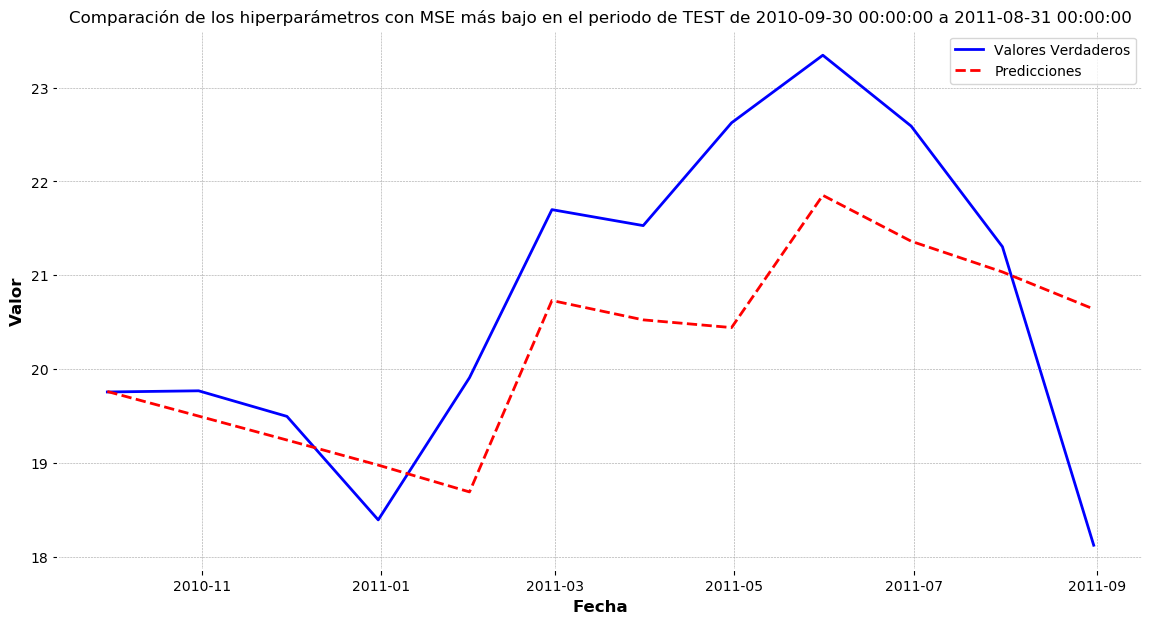

**************************************************
Índice: 564
Fecha de inicio de TEST: 2011-09-30 00:00:00
Fecha de finalización de TEST: 2012-08-31 00:00:00
Lags utilizados: 5
MSE más bajo: 1.725516255500626
Hiperparámetros: {'learning_rate': 0.18026707004781728, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.858670048109089}


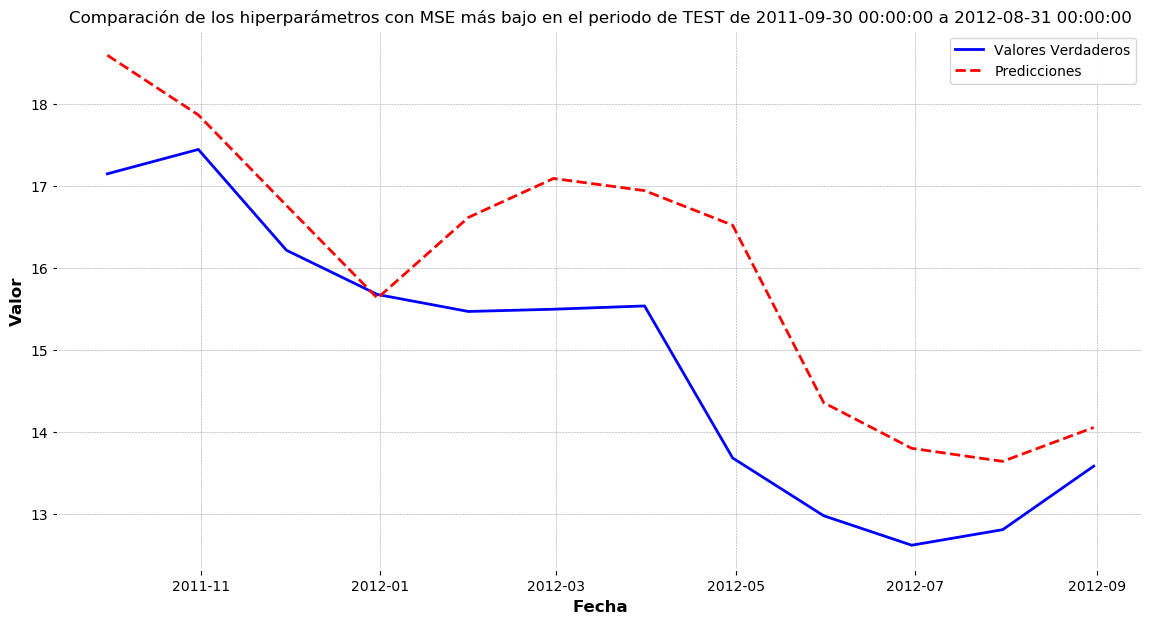

**************************************************
Índice: 680
Fecha de inicio de TEST: 2012-09-30 00:00:00
Fecha de finalización de TEST: 2013-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 0.8391977634578458
Hiperparámetros: {'learning_rate': 0.19620612210576555, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 400, 'subsample': 0.9647365785368756}


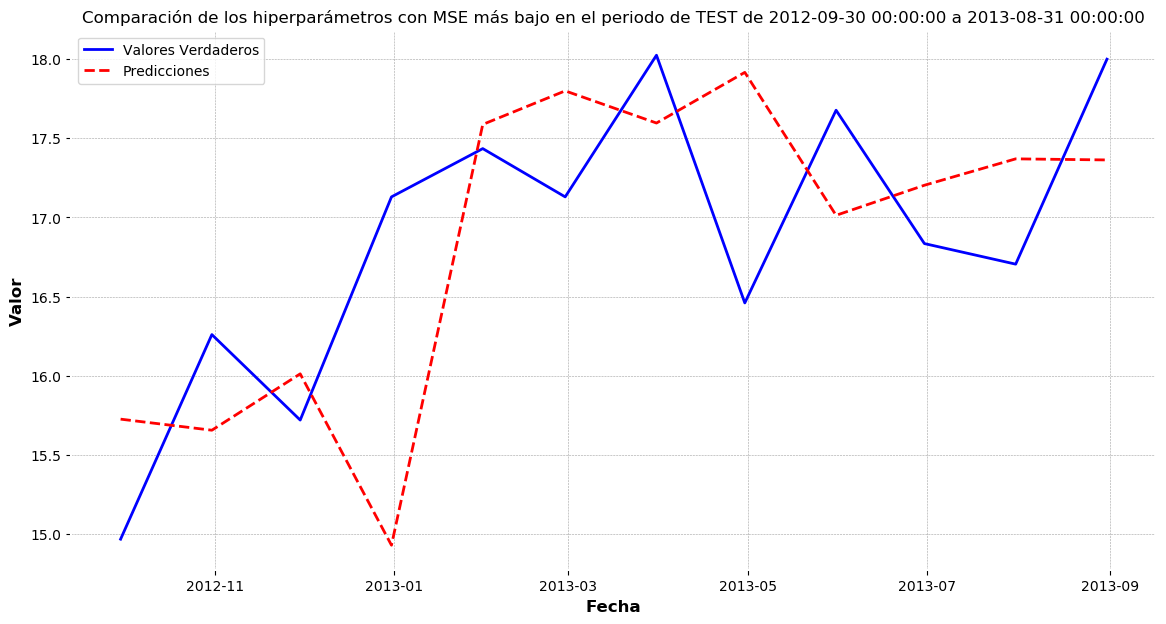

**************************************************
Índice: 785
Fecha de inicio de TEST: 2013-09-30 00:00:00
Fecha de finalización de TEST: 2014-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 38.279963423367015
Hiperparámetros: {'learning_rate': 0.0554885986145538, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 400, 'subsample': 0.8088979596560519}


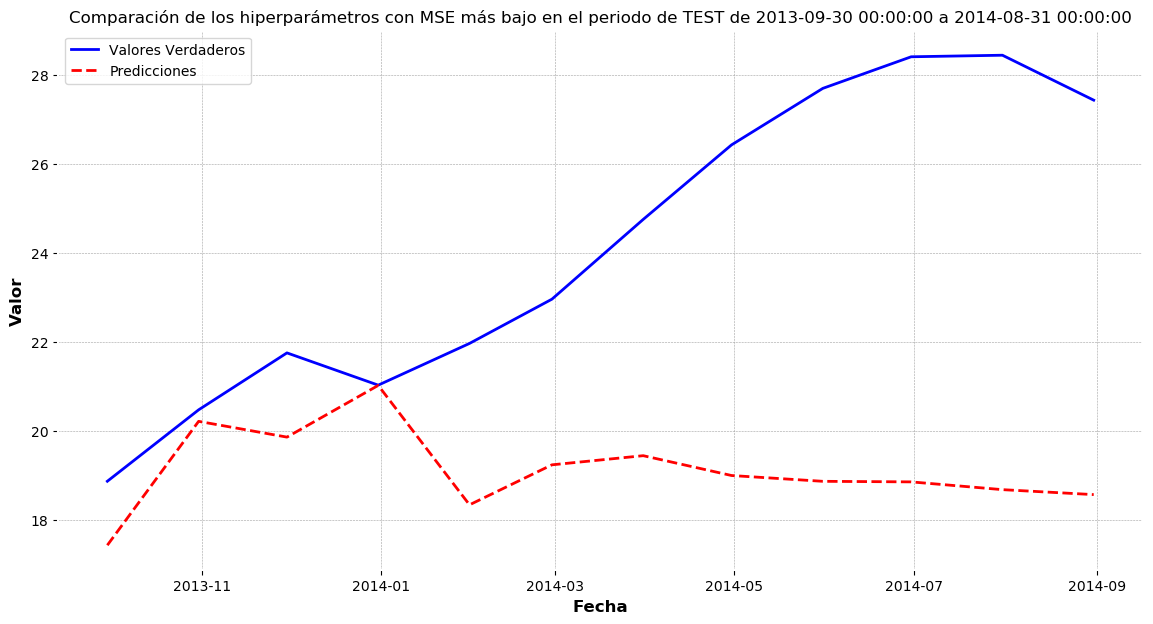

**************************************************
Índice: 852
Fecha de inicio de TEST: 2014-09-30 00:00:00
Fecha de finalización de TEST: 2015-08-31 00:00:00
Lags utilizados: 5
MSE más bajo: 10.641248502608384
Hiperparámetros: {'learning_rate': 0.14063038174576864, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.6102482078440962}


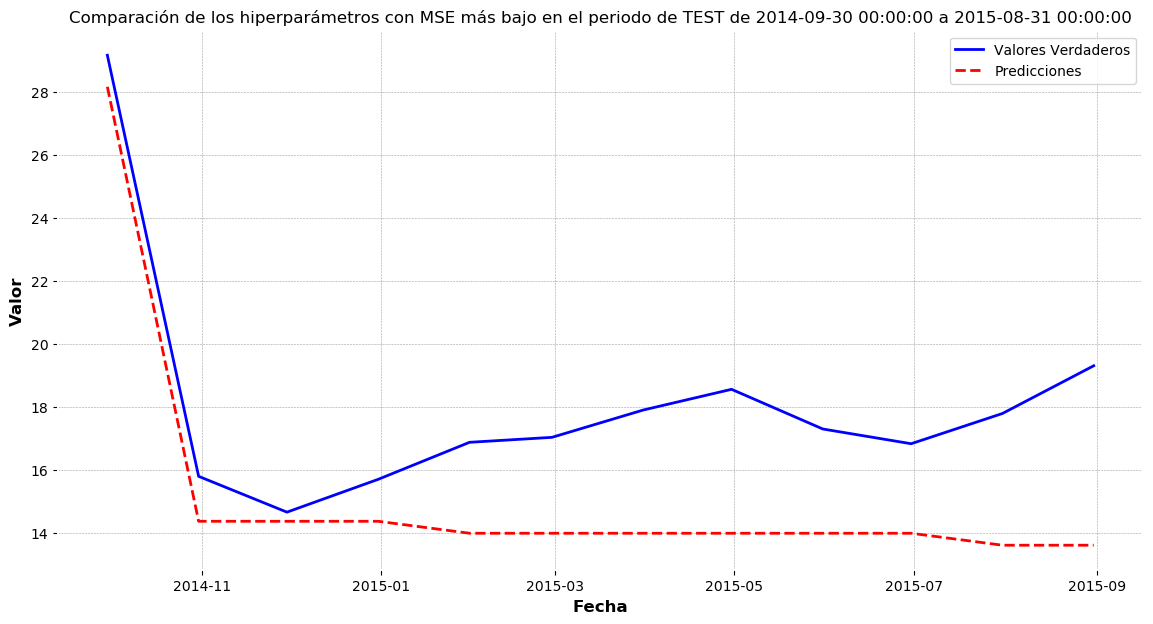

**************************************************
Índice: 956
Fecha de inicio de TEST: 2015-09-30 00:00:00
Fecha de finalización de TEST: 2016-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 0.8239453258762642
Hiperparámetros: {'learning_rate': 0.16055094839130735, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.6058676553299572}


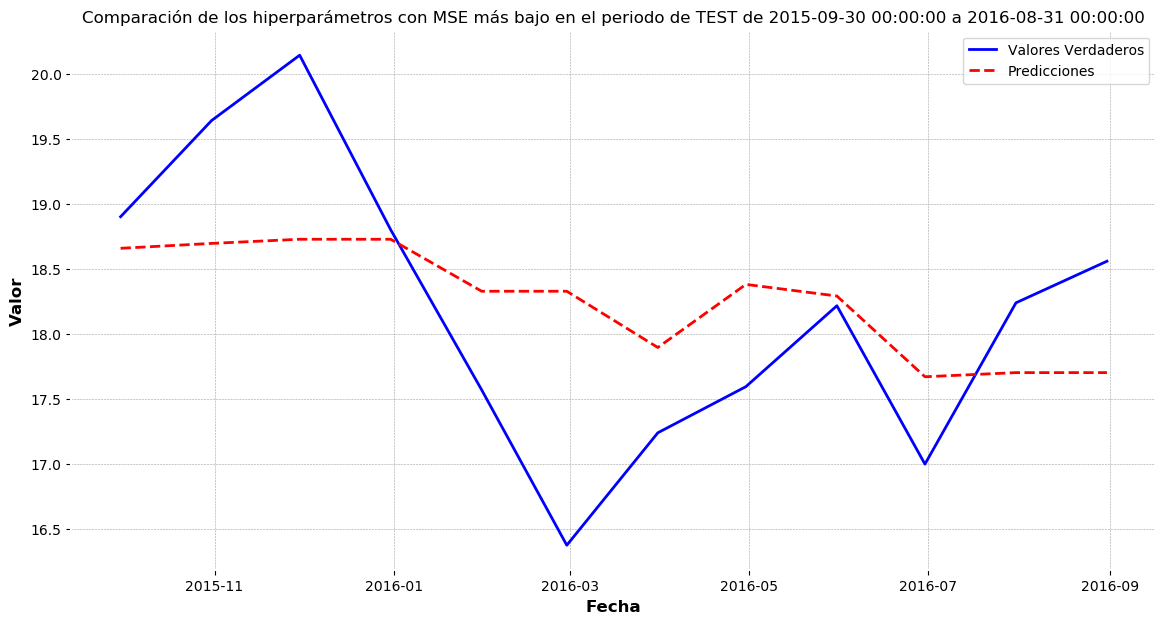

**************************************************
Índice: 1071
Fecha de inicio de TEST: 2016-09-30 00:00:00
Fecha de finalización de TEST: 2017-08-31 00:00:00
Lags utilizados: 5
MSE más bajo: 11.106600054868567
Hiperparámetros: {'learning_rate': 0.05326528685726645, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9922390832818712}


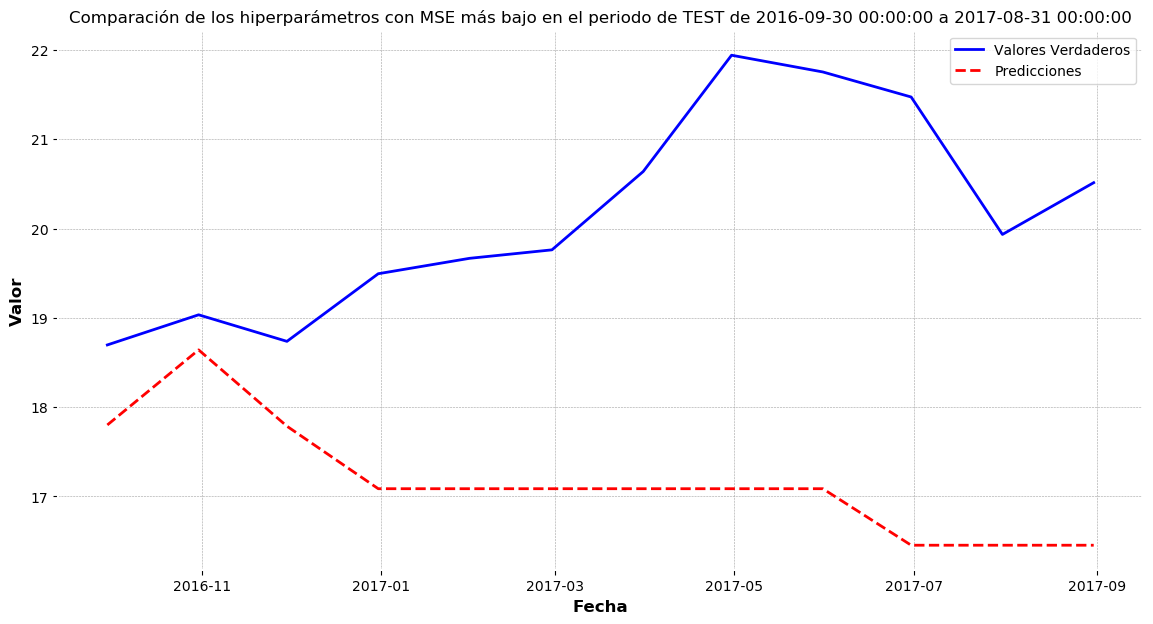

**************************************************
Índice: 1151
Fecha de inicio de TEST: 2017-09-30 00:00:00
Fecha de finalización de TEST: 2018-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 0.5075311932581048
Hiperparámetros: {'learning_rate': 0.06663802248029241, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9448813058062155}


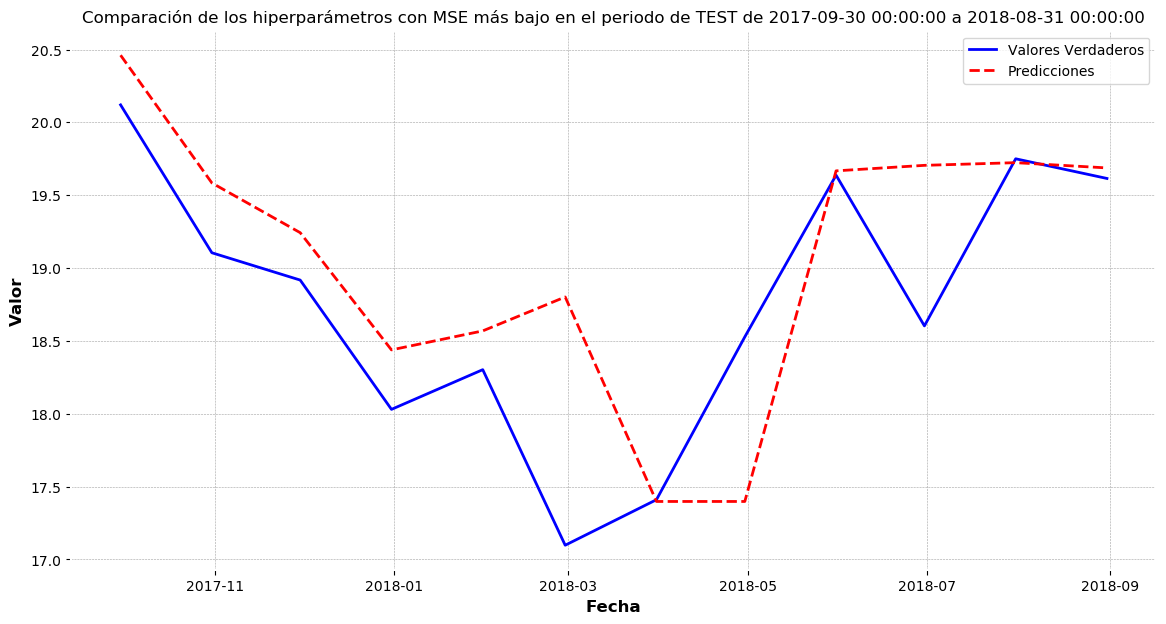

**************************************************
Índice: 1190
Fecha de inicio de TEST: 2018-09-30 00:00:00
Fecha de finalización de TEST: 2019-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 13.567052185993242
Hiperparámetros: {'learning_rate': 0.08566207896193731, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6210736406890162}


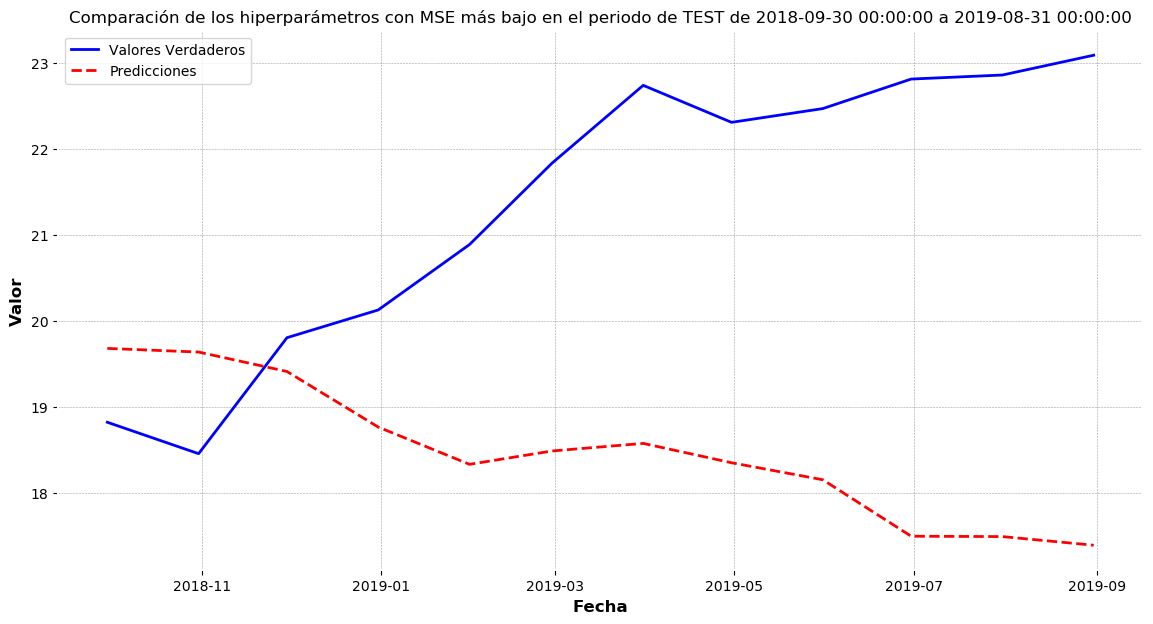

**************************************************
Índice: 1277
Fecha de inicio de TEST: 2019-09-30 00:00:00
Fecha de finalización de TEST: 2020-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 3.45415375736408
Hiperparámetros: {'learning_rate': 0.18990237365327778, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8133309015535601}


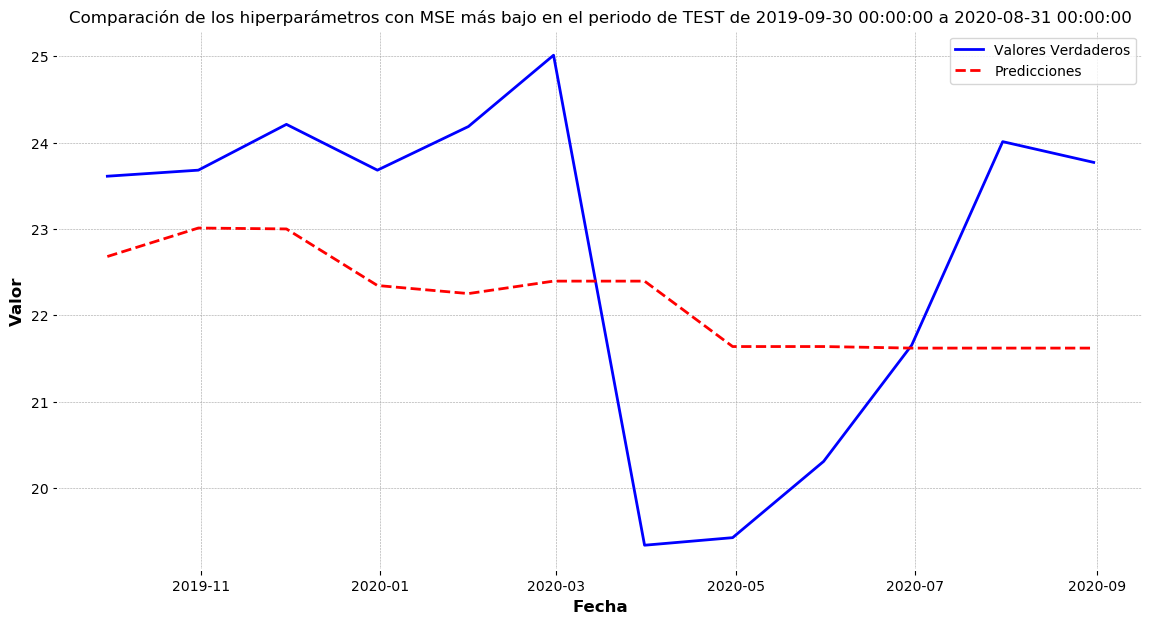

**************************************************
Índice: 1403
Fecha de inicio de TEST: 2020-09-30 00:00:00
Fecha de finalización de TEST: 2021-08-31 00:00:00
Lags utilizados: 20
MSE más bajo: 0.17085751956117531
Hiperparámetros: {'learning_rate': 0.12282436667667598, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7274782612712665}


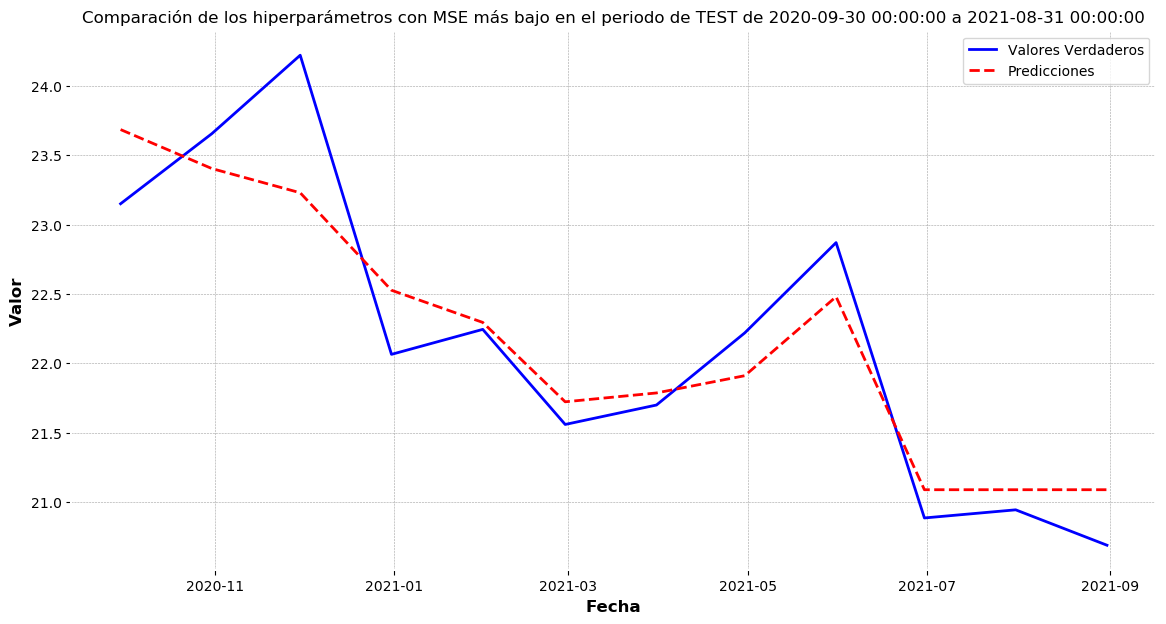

**************************************************
Índice: 1482
Fecha de inicio de TEST: 2021-09-30 00:00:00
Fecha de finalización de TEST: 2022-08-31 00:00:00
Lags utilizados: 5
MSE más bajo: 0.6644312819176128
Hiperparámetros: {'learning_rate': 0.14063038174576864, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.6102482078440962}


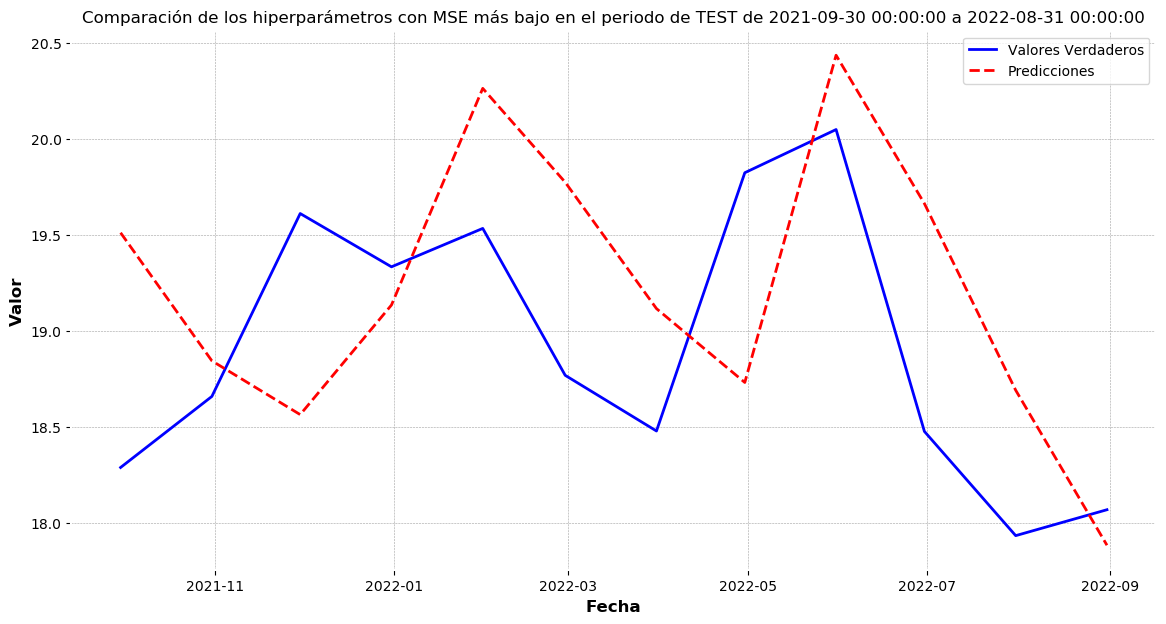

**************************************************


In [33]:
resultados_mse_minimos = resultados_xgb.loc[resultados_xgb.groupby(['start_test_date', 'end_test_date'])
                                            ['mse'].idxmin()]

resultados_mse_minimos_sorted = resultados_mse_minimos.sort_values(by='start_test_date')

for index, row in resultados_mse_minimos_sorted.iterrows():
    print(f"Índice: {index}")
    print(f"Fecha de inicio de TEST: {row['start_test_date']}")
    print(f"Fecha de finalización de TEST: {row['end_test_date']}")
    print(f"Lags utilizados: {row['lags']}")
    print(f"MSE más bajo: {row['mse']}")
    print(f"Hiperparámetros: {row['hyper']}")
    
    dates = pd.date_range(start=row['start_test_date'], end=row['end_test_date'], freq='M')
    
    lista_dividendos = dividendos_acumulados.reindex(dates, fill_value=0)
    
    row_real = row['real'] - lista_dividendos.values
    row_preds = row['preds'] - lista_dividendos.values
    
    plt.figure(figsize=(14, 7)) 
    plt.plot(dates, row_real, label='Valores Verdaderos', color='blue')
    plt.plot(dates, row_preds, label='Predicciones', color='red', linestyle='--')

    plt.title(f"Comparación de los hiperparámetros con MSE más bajo en el periodo de TEST de {row['start_test_date']} a {row['end_test_date']}")
    plt.xlabel('Fecha')
    plt.ylabel('Valor')

    plt.legend()

    plt.grid(True)

    plt.show()

    print("*"*50)

Analizamos los hiperparámetros que han tenido buenos resultados en los modelos anteriores, más en concreto en aquellos con MSE inferior a 3.

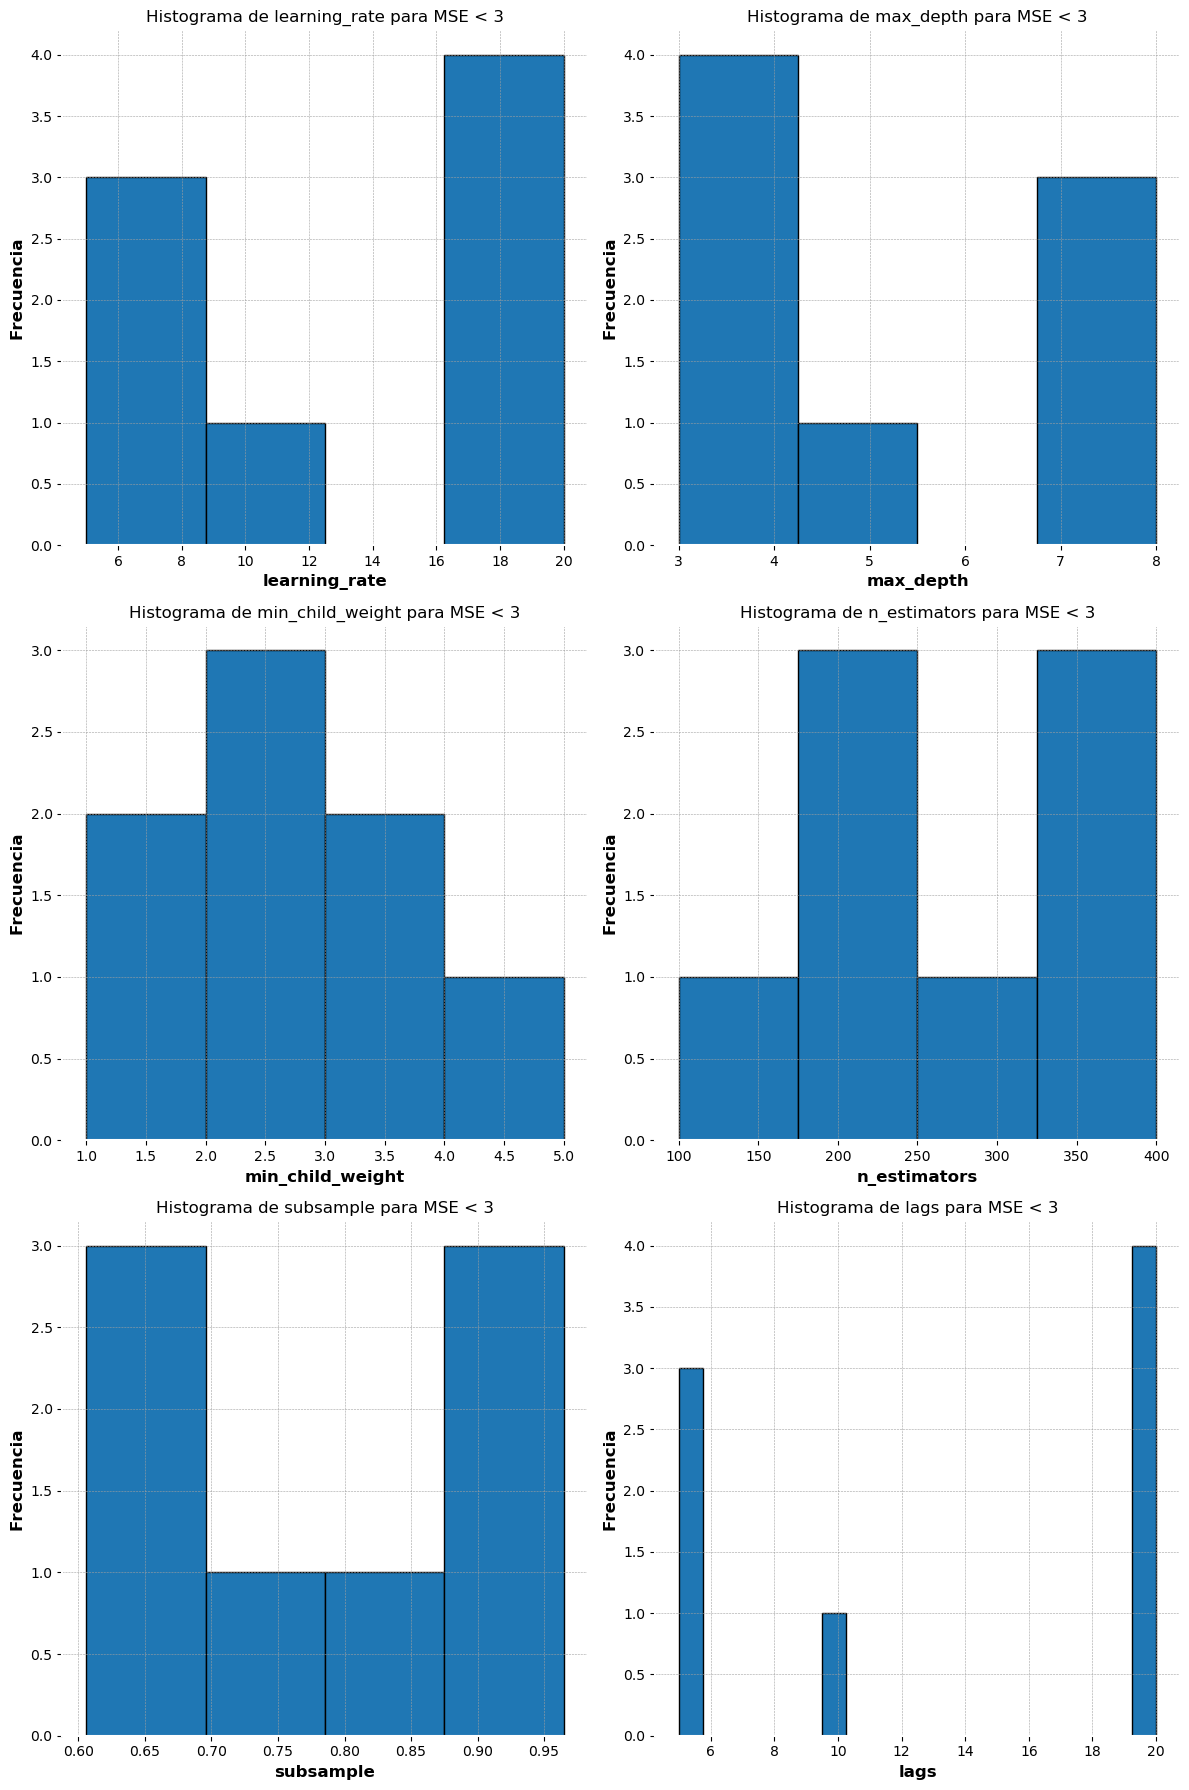

In [71]:
max_depth = resultados_mse_minimos_sorted[resultados_mse_minimos_sorted['mse'] < 3]['hyper'].apply(lambda x: x['max_depth'])
min_child_weight = resultados_mse_minimos_sorted[resultados_mse_minimos_sorted['mse'] < 3]['hyper'].apply(lambda x: x['min_child_weight'])
n_estimators = resultados_mse_minimos_sorted[resultados_mse_minimos_sorted['mse'] < 3]['hyper'].apply(lambda x: x['n_estimators'])
subsample = resultados_mse_minimos_sorted[resultados_mse_minimos_sorted['mse'] < 3]['hyper'].apply(lambda x: x['subsample'])
lags = resultados_mse_minimos_sorted[resultados_mse_minimos_sorted['mse'] < 3]['lags']

plt.figure(figsize=(12, 18))

# Histograma de learning_rate
plt.subplot(3, 2, 1)  
learning_rates.hist(bins=4, edgecolor='black')
plt.xlabel('learning_rate')
plt.ylabel('Frecuencia')
plt.title('Histograma de learning_rate para MSE < 3')
plt.grid(True)

# Histograma de max_depth
plt.subplot(3, 2, 2)  
max_depth.hist(bins=4, edgecolor='black')
plt.xlabel('max_depth')
plt.ylabel('Frecuencia')
plt.title('Histograma de max_depth para MSE < 3')
plt.grid(True)

# Histograma de min_child_weight
plt.subplot(3, 2, 3)  
min_child_weight.hist(bins=4, edgecolor='black')
plt.xlabel('min_child_weight')
plt.ylabel('Frecuencia')
plt.title('Histograma de min_child_weight para MSE < 3')
plt.grid(True)

# Histograma de n_estimators
plt.subplot(3, 2, 4)  
n_estimators.hist(bins=4, edgecolor='black')
plt.xlabel('n_estimators')
plt.ylabel('Frecuencia')
plt.title('Histograma de n_estimators para MSE < 3')
plt.grid(True)

# Histograma de subsample
plt.subplot(3, 2, 5)  
subsample.hist(bins=4, edgecolor='black')
plt.xlabel('subsample')
plt.ylabel('Frecuencia')
plt.title('Histograma de subsample para MSE < 3')
plt.grid(True)

# Histograma de lags
plt.subplot(3, 2, 6)  
lags.hist(bins=20, edgecolor='black')
plt.xlabel('lags')
plt.ylabel('Frecuencia')
plt.title('Histograma de lags para MSE < 3')
plt.grid(True)

plt.tight_layout()

plt.show()